<a href="https://www.kaggle.com/code/noohinaaz/effective-coffee-sales-analysis-with-50-insights?scriptVersionId=233853834" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

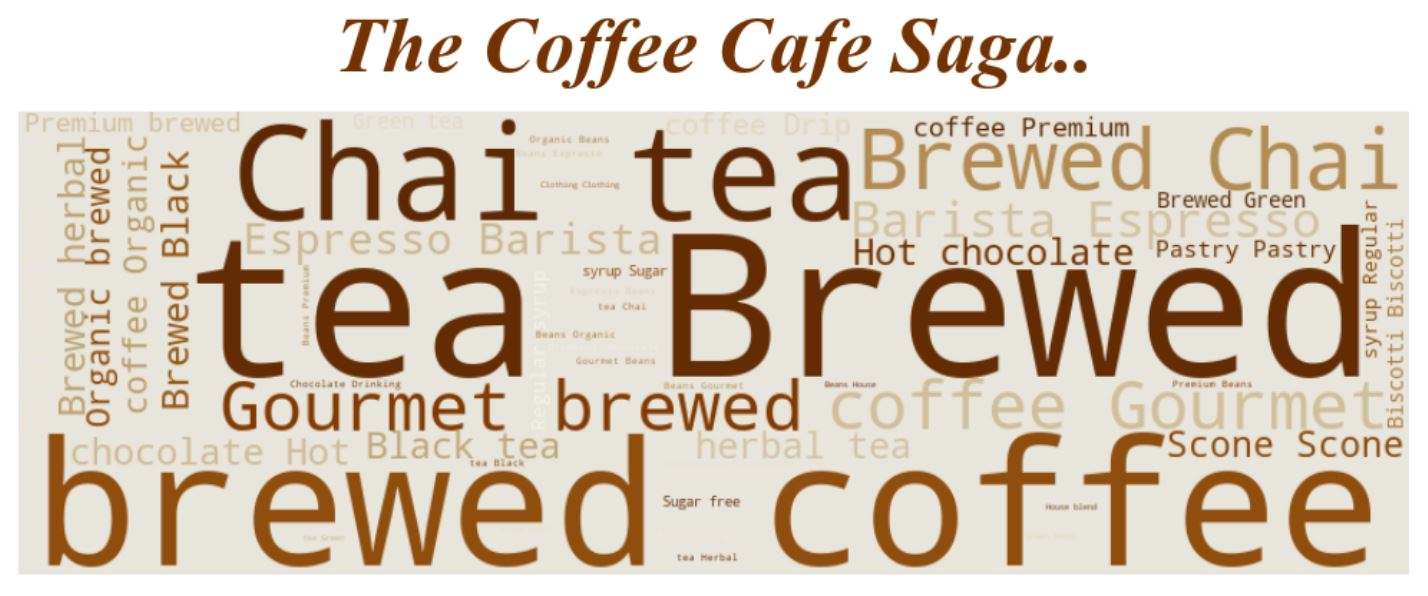

<h1 style="font-size:50px; font-family:Times New Roman; font-weight:bold; font-style:italic; background-color:#e0d2b7; color:#602814; text-align:left; border-radius:1px 1px;">
The Cafe Saga Starts Here....
</h1>


In [1]:
# https://www.kaggle.com/datasets/divu2001/coffee-shop-sales-analysis

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/coffee-shop-sales-analysis/Project.csv


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
plt.rcParams['font.family'] = 'Times New Roman'
import warnings
warnings.filterwarnings("ignore")

In [4]:
df = pd.read_csv("/kaggle/input/coffee-shop-sales-analysis/Project.csv")

In [5]:
df.shape

(149116, 18)

In [6]:
df.head()

,transaction_id,transaction_date,transaction_time,store_id,store_location,product_id,transaction_qty,unit_price,Total_Bill,product_category,product_type,product_detail,Size,Month Name,Day Name,Hour,Month,Day of Week
0,114301,01-06-2023,11:33:29,3,Astoria,45,1,3.0,3.0,Tea,Brewed herbal tea,Peppermint,Large,June,Thursday,11,6,3
1,115405,02-06-2023,11:18:24,3,Astoria,45,1,3.0,3.0,Tea,Brewed herbal tea,Peppermint,Large,June,Friday,11,6,4
2,115478,02-06-2023,12:02:45,3,Astoria,45,1,3.0,3.0,Tea,Brewed herbal tea,Peppermint,Large,June,Friday,12,6,4
3,116288,02-06-2023,19:39:47,3,Astoria,45,1,3.0,3.0,Tea,Brewed herbal tea,Peppermint,Large,June,Friday,19,6,4
4,116714,03-06-2023,12:24:57,3,Astoria,45,1,3.0,3.0,Tea,Brewed herbal tea,Peppermint,Large,June,Saturday,12,6,5


In [7]:
df.nunique()

transaction_id      149116
transaction_date       181
transaction_time     25762
store_id                 3
store_location           3
product_id              80
transaction_qty          6
unit_price              41
Total_Bill              75
product_category         9
product_type            29
product_detail          45
Size                     4
Month Name               6
Day Name                 7
Hour                    15
Month                    6
Day of Week              7
dtype: int64

In [8]:
df.isna().sum()/df.shape[0]*100

transaction_id      0.0
transaction_date    0.0
transaction_time    0.0
store_id            0.0
store_location      0.0
product_id          0.0
transaction_qty     0.0
unit_price          0.0
Total_Bill          0.0
product_category    0.0
product_type        0.0
product_detail      0.0
Size                0.0
Month Name          0.0
Day Name            0.0
Hour                0.0
Month               0.0
Day of Week         0.0
dtype: float64

In [9]:
df.dtypes

transaction_id        int64
transaction_date     object
transaction_time     object
store_id              int64
store_location       object
product_id            int64
transaction_qty       int64
unit_price          float64
Total_Bill          float64
product_category     object
product_type         object
product_detail       object
Size                 object
Month Name           object
Day Name             object
Hour                  int64
Month                 int64
Day of Week           int64
dtype: object

In [10]:
df.columns

Index(['transaction_id', 'transaction_date', 'transaction_time', 'store_id',
       'store_location', 'product_id', 'transaction_qty', 'unit_price',
       'Total_Bill', 'product_category', 'product_type', 'product_detail',
       'Size', 'Month Name', 'Day Name', 'Hour', 'Month', 'Day of Week'],
      dtype='object')

In [11]:
cols = ['store_location', 'transaction_qty', 'unit_price', 'Total_Bill', 'product_category', 'Size', 'Month Name', 'Day Name', 'Hour']

for i in cols:
    print(i)
    print(df[i].unique())
    print("*" * 100)


store_location
['Astoria' 'Lower Manhattan' "Hell's Kitchen"]
****************************************************************************************************
transaction_qty
[1 2 3 4 8 6]
****************************************************************************************************
unit_price
[ 3.    2.5   3.75  3.5   3.25  4.5   0.8   8.95  4.38  4.06  5.63  4.69
  2.65  9.25 10.95  9.5  13.33  6.4   7.6  28.   23.   12.   14.   14.75
 20.45 10.   22.5  45.   19.75 15.   21.   18.    4.75  4.    2.55  3.1
  2.45  2.1   2.2   2.    4.25]
****************************************************************************************************
Total_Bill
[  3.     2.5    3.75   3.5    3.25   4.5    0.8    8.95   4.38   4.06
   5.63   4.69   2.65   9.25  10.95   9.5   13.33   6.4    7.6   28.
  23.    12.    14.    14.75  20.45  10.    22.5   45.    19.75  15.
  21.    18.     4.75   4.     2.55   3.1    2.45   2.1    2.2    2.
   4.25   8.     6.2    5.1    6.     5.     9.     7. 

In [12]:
df.describe()

,transaction_id,store_id,product_id,transaction_qty,unit_price,Total_Bill,Hour,Month,Day of Week
count,149116.000000,149116.000000,149116.000000,149116.000000,149116.000000,149116.000000,149116.000000,149116.000000,149116.000000
mean,74737.371872,5.342063,47.918607,1.438276,3.382219,4.686367,11.735790,3.988881,2.982336
std,43153.600016,2.074241,17.930020,0.542509,2.658723,4.227099,3.764662,1.673091,1.996650
min,1.000000,3.000000,1.000000,1.000000,0.800000,0.800000,6.000000,1.000000,0.000000
25%,37335.750000,3.000000,33.000000,1.000000,2.500000,3.000000,9.000000,3.000000,1.000000
50%,74727.500000,5.000000,47.000000,1.000000,3.000000,3.750000,11.000000,4.000000,3.000000
75%,112094.250000,8.000000,60.000000,2.000000,3.750000,6.000000,15.000000,5.000000,5.000000
max,149456.000000,8.000000,87.000000,8.000000,45.000000,360.000000,20.000000,6.000000,6.000000


<h1 style="font-size:20px; font-family:Times New Roman; font-weight:bold; background-color:#e0d2b7; color:#602814; text-align:left; border-radius:1px 1px;">
Errors Need to be FIXED..
</h1>


In [13]:
df['transaction_date'] = pd.to_datetime(df['transaction_date'], dayfirst=True)
df['weekday'] = df['transaction_date'].dt.day_name()
df.loc[df['Total_Bill'] == 360, 'Total_Bill'] = 36


In [14]:
weekly_order = ["Sunday","Monday","Tuesday","Wednesday","Thursday","Friday","Saturday"]
df["Day Name"] = pd.Categorical(df["Day Name"], categories=weekly_order, ordered=True)
month_order = ["January", "February", "March", "April", "May", "June"]
df["Month Name"] = pd.Categorical(df["Month Name"], categories=month_order, ordered=True)

In [15]:
barcolor = ["#340100","#602814"]
color4 = [
    "#fffff4",  # Canvas
    "#e0d2b7",  # Latte
    "#cdac81",  # Mocha
    "#ba8a5c",  # Brew
    "#78400f",  # Espresso
    "#340100"   # Roast
]
facecolors =["#e0d2b7",       # light one
            "#d2ab80"]         #caramel one

<h1 style="font-size:30px; font-family:Times New Roman; font-weight:bold; background-color:#e0d2b7; color:#602814; text-align:left; border-radius:1px 1px;">
Let's see how the data looks like..
</h1>


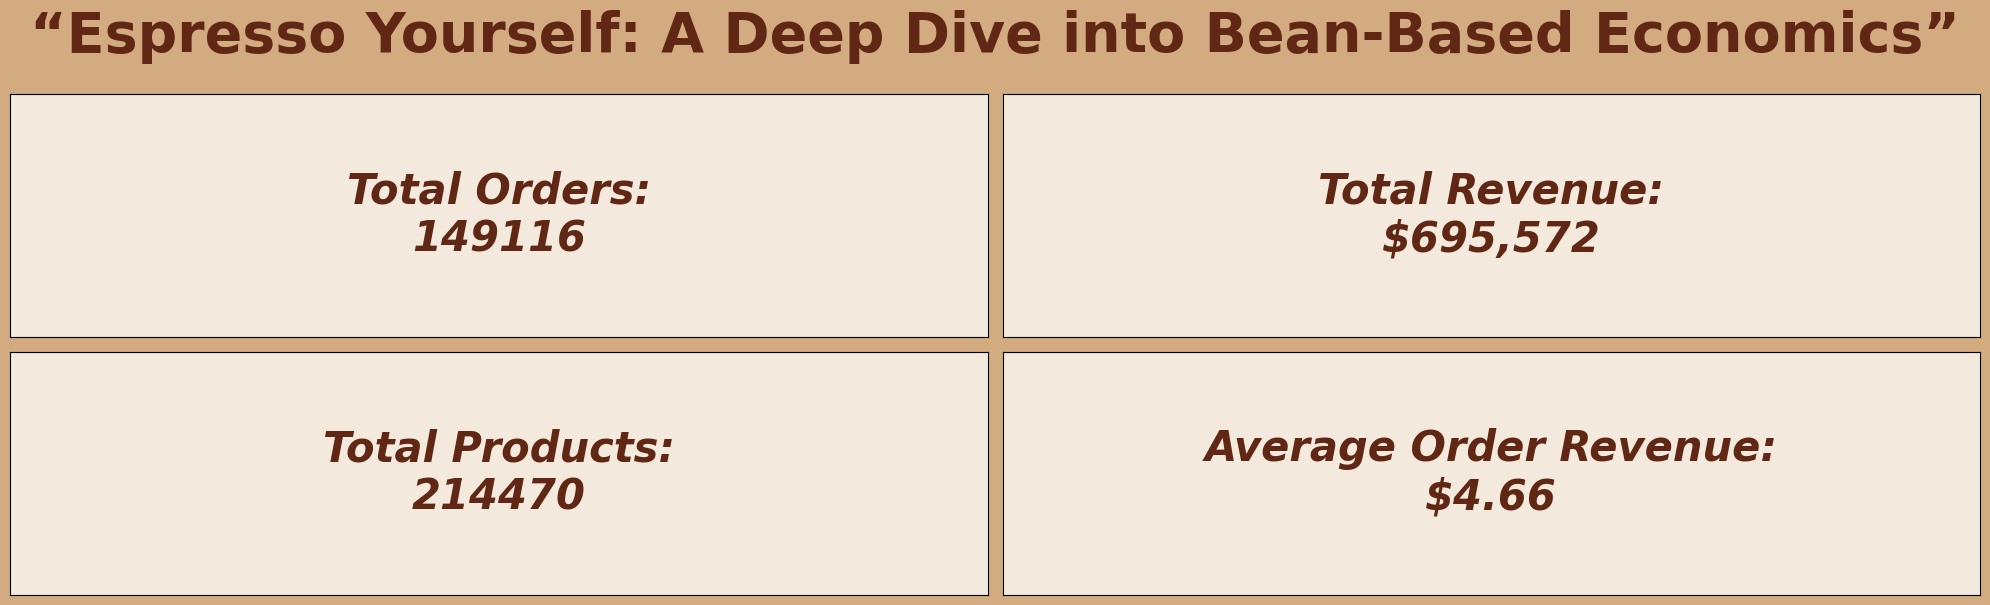

In [16]:
fig = plt.figure(figsize=(20, 6))
fig.patch.set_facecolor("#d2ab80")
fig.suptitle("“Espresso Yourself: A Deep Dive into Bean-Based Economics”", fontsize=40, fontweight='bold', color="#602814", y=1)
ax = [None for _ in range(4)]
ax[0] = plt.subplot2grid((2, 2), (0, 0), colspan=1, facecolor="#f3e9dc")
ax[0].text(0.5, 0.5, f"Total Orders:\n{df.shape[0]}", 
           fontsize=30, ha='center', va='center',fontweight="bold",color=barcolor[1],style="italic")
ax[1] = plt.subplot2grid((2, 2), (0, 1), colspan=1, facecolor="#f3e9dc")
ax[1].text(0.5, 0.5, f"Total Revenue:\n${df['Total_Bill'].sum():,.0f}",
           fontsize=30, ha='center', va='center',fontweight="bold",color=barcolor[1],style="italic")
ax[2] = plt.subplot2grid((2, 2), (1, 0), colspan=1, facecolor="#f3e9dc")
ax[2].text(0.5, 0.5, f"Total Products:\n{df['transaction_qty'].sum()}", 
           fontsize=30, ha='center', va='center',fontweight="bold",color=barcolor[1],style="italic")
ax[3] = plt.subplot2grid((2, 2), (1, 1), colspan=1, facecolor="#f3e9dc")
average_revenue = df["Total_Bill"].sum() / df.shape[0]
ax[3].text(0.5, 0.5, f"Average Order Revenue:\n${average_revenue:.2f}", fontsize=30, ha='center',
           va='center', fontweight="bold", color=barcolor[1], style="italic")
for ix in range(4):
    ax[ix].set_title("")
    ax[ix].set_xticks([])
    ax[ix].set_yticks([])

fig.tight_layout()


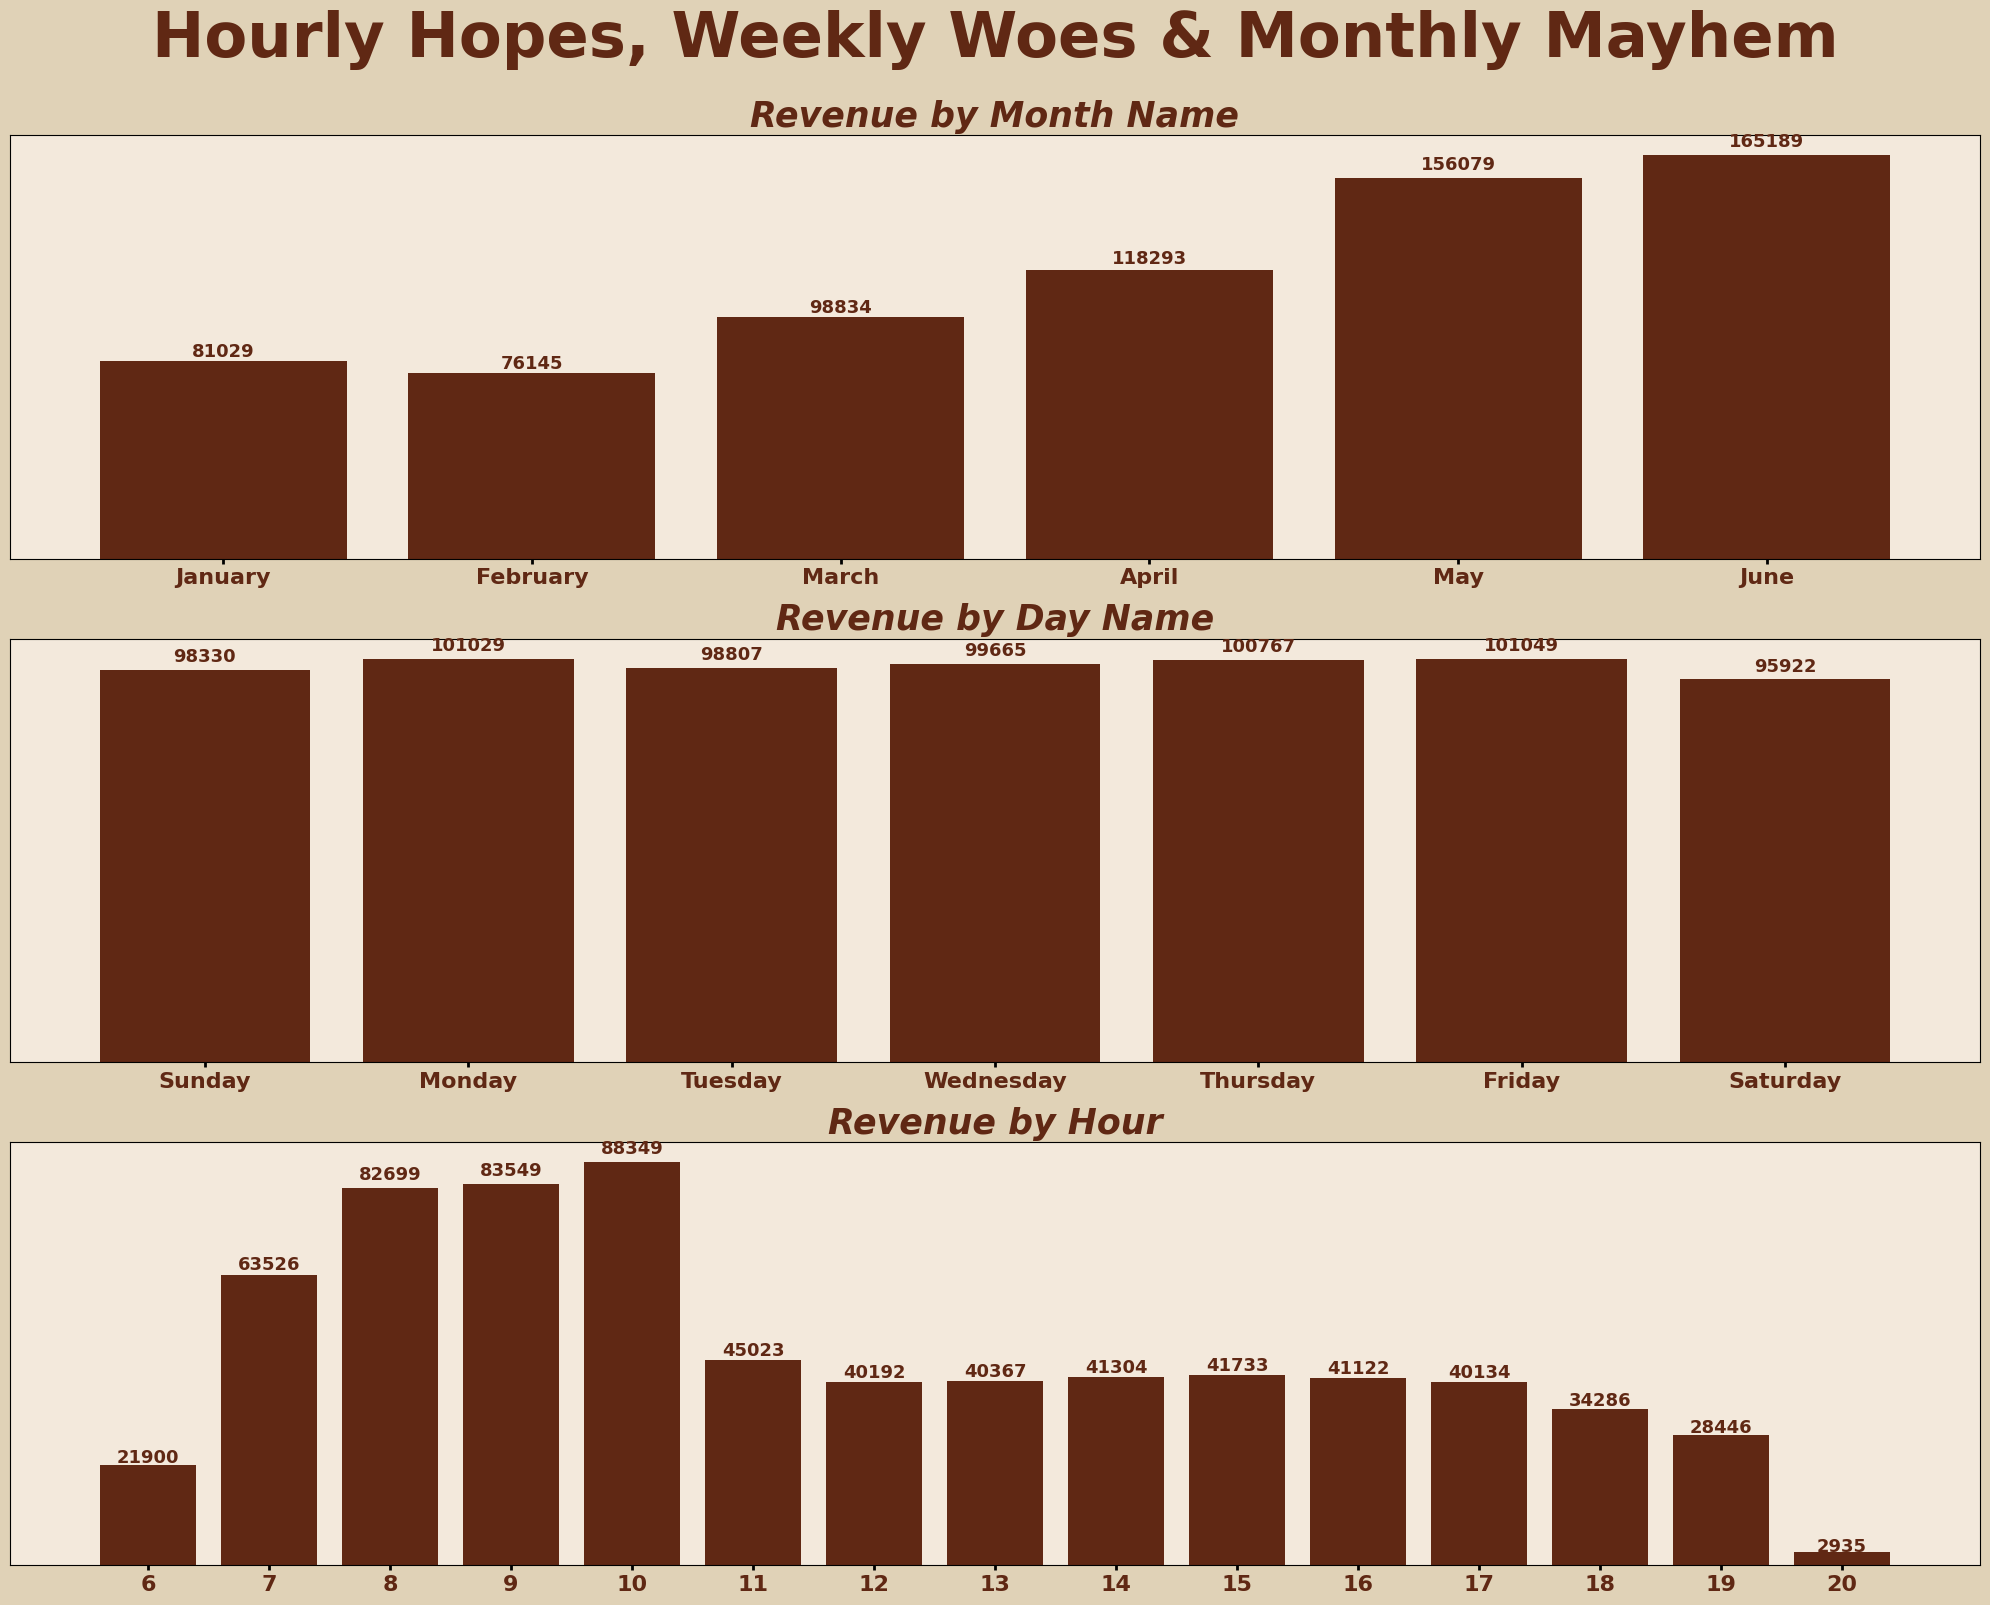

In [17]:
def plot_simple_revenue_bar(ax, df, col):
    barcolor = ["#340100", "#602814"]
    data = df.groupby(col)["Total_Bill"].sum()

    x = range(len(data))
    ax.bar(x, data.values, color=barcolor[1])

    ax.set_facecolor("#f3e9dc")
    ax.set_ylabel("")
    ax.set_yticks([])
    ax.set_title(f"Revenue by {col}", fontsize=25, fontweight='bold', color=barcolor[1],style="italic")

    for i, val in enumerate(data.values):
        ax.text(i, val + val * 0.02, f"{int(val)}", ha='center', fontsize=13,
                fontweight='bold', color=barcolor[1])

    ax.set_xticks(x)
    ax.set_xticklabels(data.index, fontsize=16, fontweight='bold', color=barcolor[1])
    ax.tick_params(axis='x', labelsize=16, width=2)
    ax.grid(False)
fig = plt.figure(figsize=(20, 16))
fig.patch.set_facecolor(facecolors[0])
fig.suptitle("Hourly Hopes, Weekly Woes & Monthly Mayhem", fontsize=45, fontweight='bold', color="#602814", y=1)
axes = [plt.subplot2grid((3, 1), (i, 0), facecolor="#f3e9dc") for i in range(3)]

plot_simple_revenue_bar(axes[0], df, 'Month Name')
plot_simple_revenue_bar(axes[1], df, 'Day Name')
plot_simple_revenue_bar(axes[2], df, 'Hour')

fig.tight_layout()
plt.show()


<h1 style="font-size:20px; font-family:Times New Roman; font-weight:bold; background-color:white; color:#602814; text-align:left; border-radius:1px 1px;">
"A Coffee Intermission: Let’s Absorb the Data"
</h1>

- **A sudden drop in revenue happened from January to February. My best guess? New Year happened.**

- **Monday seems to have more revenue, meaning people really prefer coffee and tea over everything else.**

- **It looks like the revenue triples in numbers from 6:00 a.m. to 7:00 a.m. — it's called rush hour.**

- **Rush hours can be defined from 8:00 a.m. to 10:00 a.m.**

- **Revenue starts declining like caffine drains out of system as the day ends, after 7:00 p.m.**

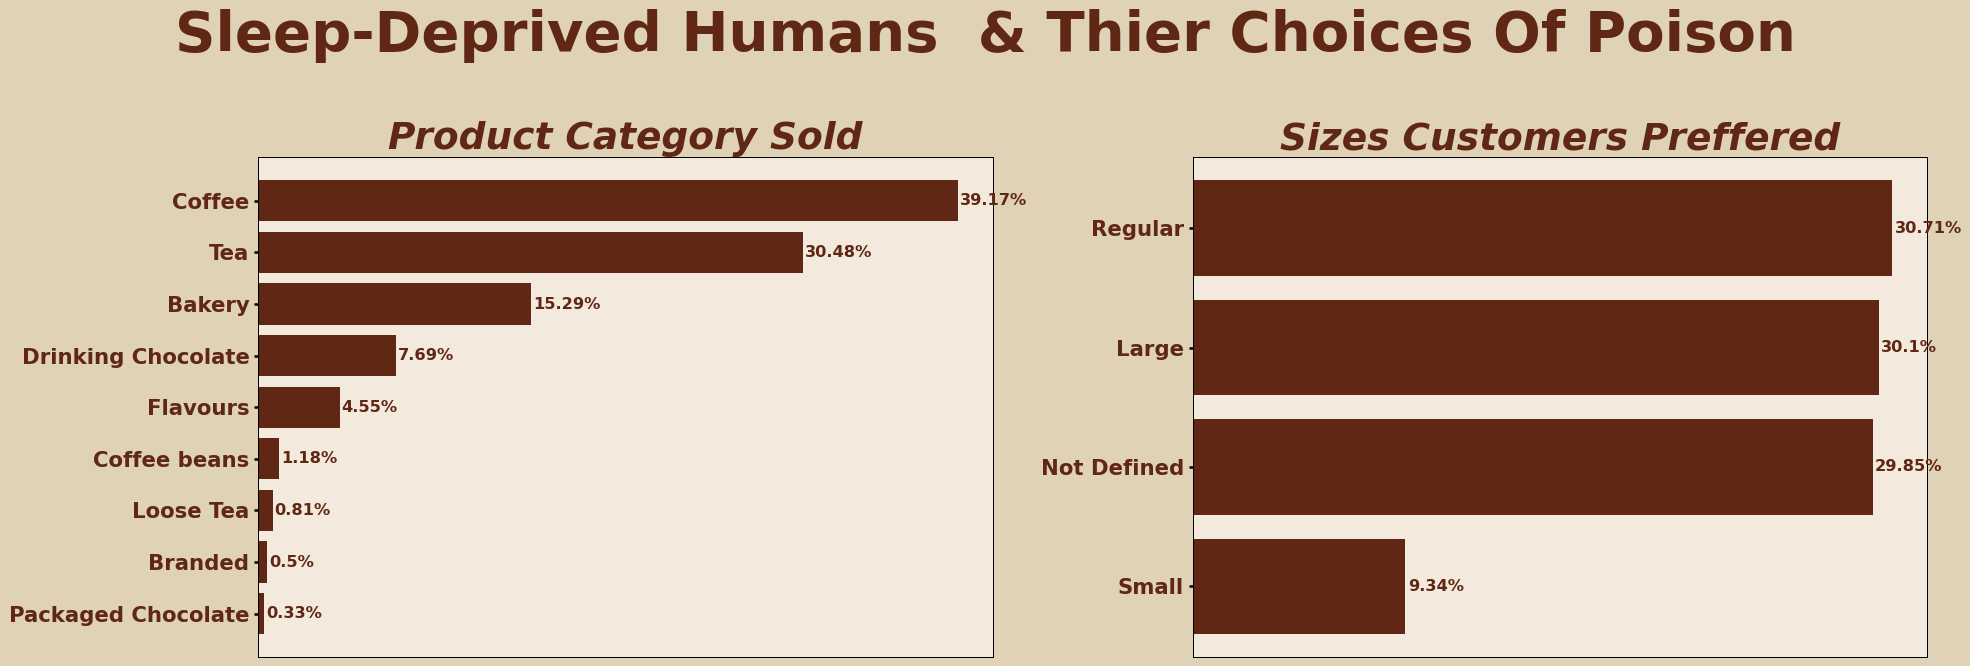

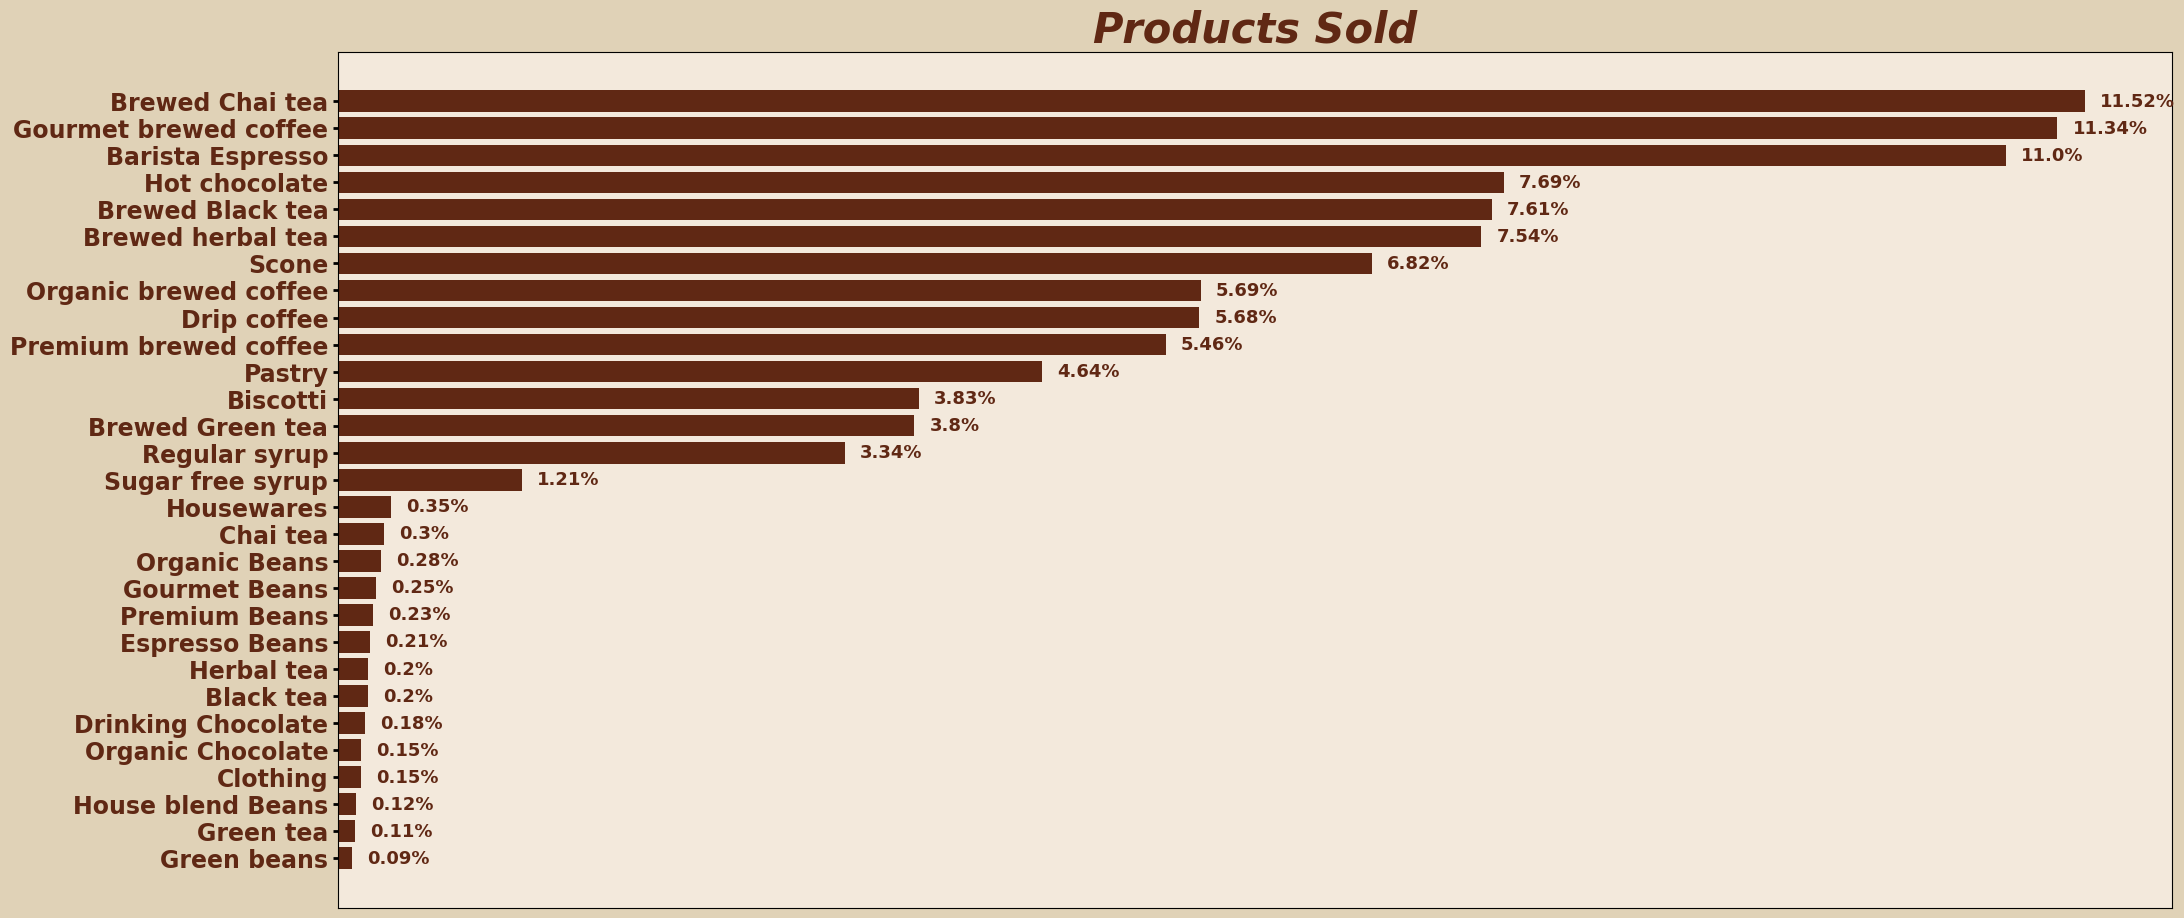

In [18]:
def plot_percent_distribution3(ax, df, col,title):
    data = (df[col].value_counts(normalize=True) * 100).round(2).sort_values(ascending=True)

    ax.barh(data.index.astype(str), data.values, color=barcolor[1])
    ax.set_xlabel(None)
    ax.set_xticks([])
    ax.set_title(title, fontsize=30, fontweight='bold', color=barcolor[1],weight="bold",style="italic")
    for i, (idx, val) in enumerate(zip(data.index, data.values)):
        ax.text(val + 0.1, i, f"{val}%", va='center',
                fontsize=13, fontweight='bold', color=barcolor[1])
    ax.set_yticklabels(data.index.astype(str), fontsize=17, fontweight='bold', color=barcolor[1])
    ax.tick_params(axis='y', labelsize=17, width=2)
    ax.grid(False)
fig = plt.figure(figsize=(22, 7),dpi=90)
fig.patch.set_facecolor(facecolors[0])
fig.suptitle("Sleep-Deprived Humans  & Thier Choices Of Poison", fontsize=45, fontweight='bold', color="#602814", y=1.05)
ax = [None for _ in range(2)]
ax[0] = plt.subplot2grid((1, 4), (0, 0), colspan=2, facecolor="#f3e9dc")
ax[1] = plt.subplot2grid((1, 4), (0, 2), colspan=2, facecolor="#f3e9dc")
plot_percent_distribution3(ax[0], df, 'product_category',title="Product Category Sold")
plot_percent_distribution3(ax[1], df, 'Size',title="Sizes Customers Preffered")
fig.tight_layout()
fig = plt.figure(figsize=(22, 18))
fig.patch.set_facecolor(facecolors[0])
ax = [None for _ in range(1)]
ax[0] = plt.subplot2grid((2, 4), (0, 0), colspan=4, facecolor="#f3e9dc")
plot_percent_distribution3(ax[0], df, "product_type",title="Products Sold")
fig.tight_layout()

<h1 style="font-size:20px; font-family:Times New Roman; font-weight:bold; background-color:white; color:#602814; text-align:left; border-radius:1px 1px;">
"A Coffee Intermission: Let’s Absorb the Data"
</h1>

- **Coffee and tea alone comprise 70% of the data, leading us to believe that people can’t survive without these beverages.**
 
- **It honestly feels like we’re watching an episode of Beverage Wars where regular cups are fighting with large cups to make it to the top.**

- **Among the top 10 tea and coffee products, somehow hot chocolate and scones made it to the list.**



<h1 style="font-size:30px; font-family:Times New Roman; font-weight:bold;  background-color:#e0d2b7; color:#602814; text-align:left; border-radius:1px 1px;">
From Brewed to Truth: Let the Caffeinated Analysis Begin
</h1>


In [19]:
favourites = (
    df.groupby(["store_location", "product_category"])["Total_Bill"]
      .sum()
      .reset_index(name="count")
      .sort_values(["store_location", "count"], ascending=[True, False])
)
favourites

,store_location,product_category,count
2,Astoria,Coffee,89744.30
8,Astoria,Tea,67839.90
0,Astoria,Bakery,26599.75
4,Astoria,Drinking Chocolate,26335.25
3,Astoria,Coffee beans,10219.20
1,Astoria,Branded,5457.00
6,Astoria,Loose Tea,3194.00
5,Astoria,Flavours,1764.80
7,Astoria,Packaged Chocolate,1089.71
11,Hell's Kitchen,Coffee,91222.65


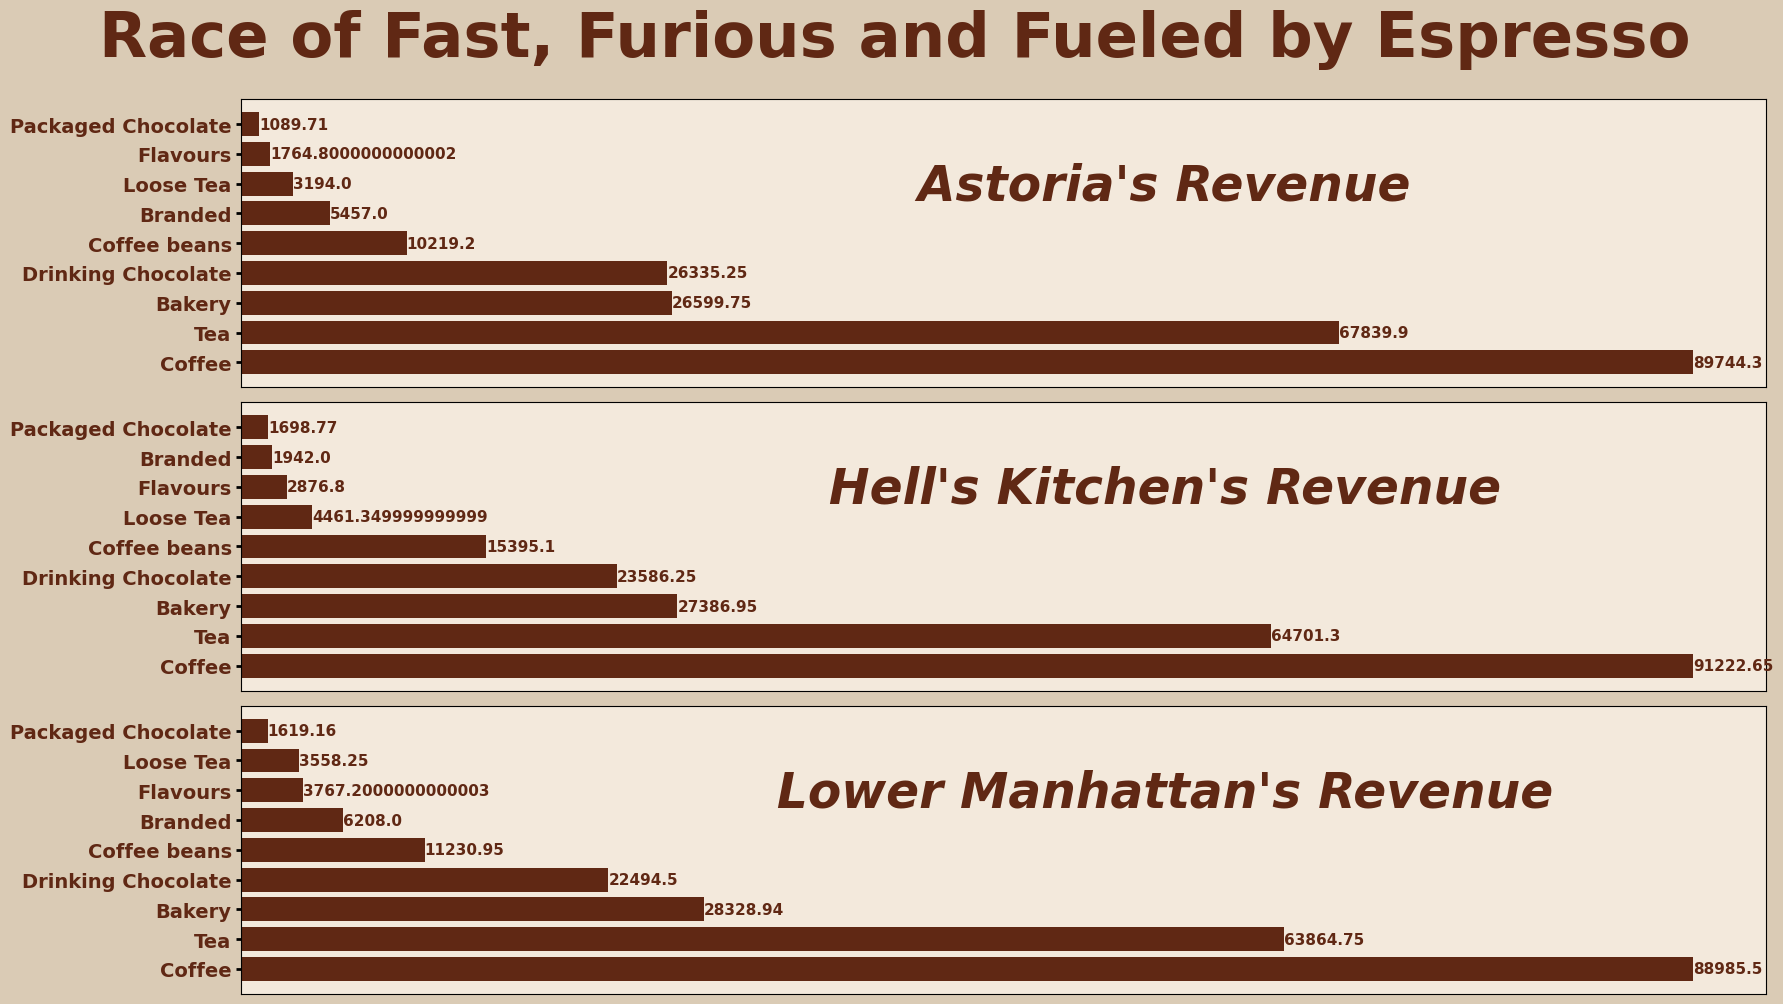

In [20]:
def plot_category_revenue(ax, df, barcolor):
    ax.barh(df["product_category"], df["count"], color=barcolor[1])
    ax.set_xlabel(None)
    ax.set_xticks([])
    ax.set_yticklabels(df["product_category"], fontsize=14, fontweight='bold', color=barcolor[1])
    ax.tick_params(axis='y', labelsize=14, width=2)
    ax.grid(False)
    ax.text(0.6, 0.7,f" {df.store_location.unique()[0]}'s Revenue", transform=ax.transAxes, fontsize=35, fontweight='bold', style="italic",color=barcolor[1], ha='center', va='center')
    for i, (label, val) in enumerate(zip(df["product_category"], df["count"])):
        ax.text(val + 0.1, i, f"{val}", va='center',
                fontsize=11, fontweight='bold', color=barcolor[1])
        
favourites1 = favourites[favourites["store_location"] == "Astoria"]
favourites2 = favourites[favourites["store_location"] == "Hell's Kitchen"]
favourites3 = favourites[favourites["store_location"] == "Lower Manhattan"]
fig, axs = plt.subplots(3, 1, figsize=(18, 10))
facecolors = ["#dacbb5","#f3e9dc"]
fig.patch.set_facecolor(facecolors[0])
fig.suptitle("Race of Fast, Furious and Fueled by Espresso", fontsize=45, fontweight='bold', color="#602814", y=1)
axs[0].set_facecolor("#f3e9dc")
axs[1].set_facecolor("#f3e9dc")
axs[2].set_facecolor("#f3e9dc")
plot_category_revenue(axs[0], favourites1, barcolor)
plot_category_revenue(axs[1], favourites2, barcolor)
plot_category_revenue(axs[2], favourites3, barcolor)
plt.tight_layout()
plt.show()

<h1 style="font-size:20px; font-family:Times New Roman; font-weight:bold; background-color:white; color:#602814; text-align:left; border-radius:1px 1px;">
"A Coffee Intermission: Let’s Absorb the Data"
</h1>

- **Coffee is King Across All Locations.**
- **Tea Is the Quiet Runner-Up.**
- **Bakery Battles Drinking Chocolate for Bronze.**
- **Branded and Packaged Items Are Minor Players.** 
- **Hell’s Kitchen Loves Its Beans as it records highest revenue for Beans.** 
- **Flavours and Loose Tea are wildly inconsistent.**

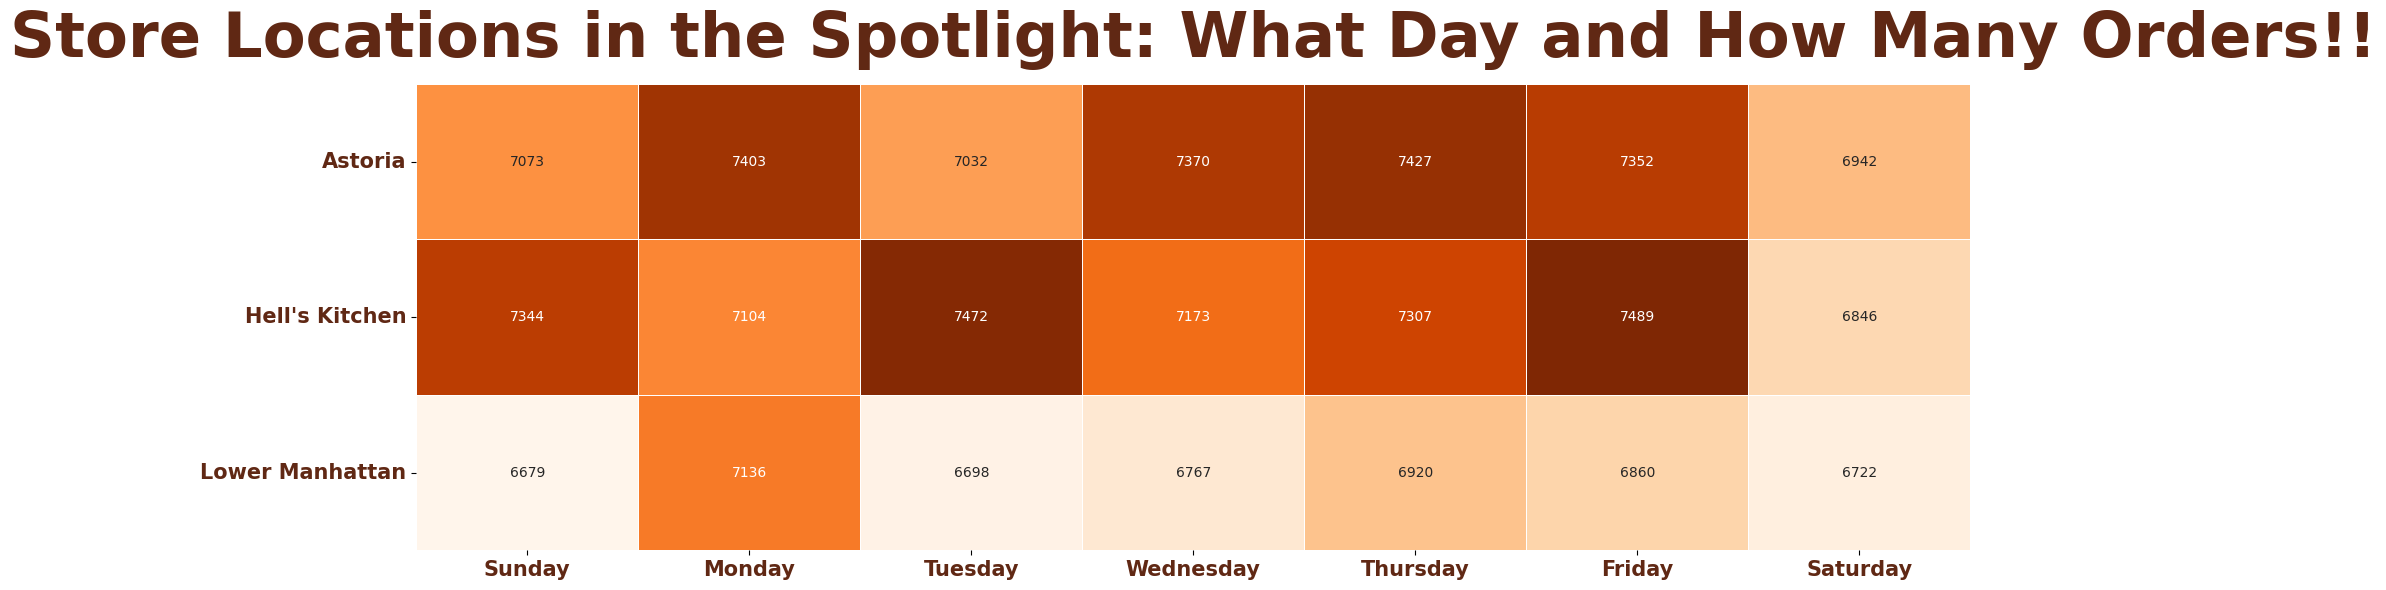

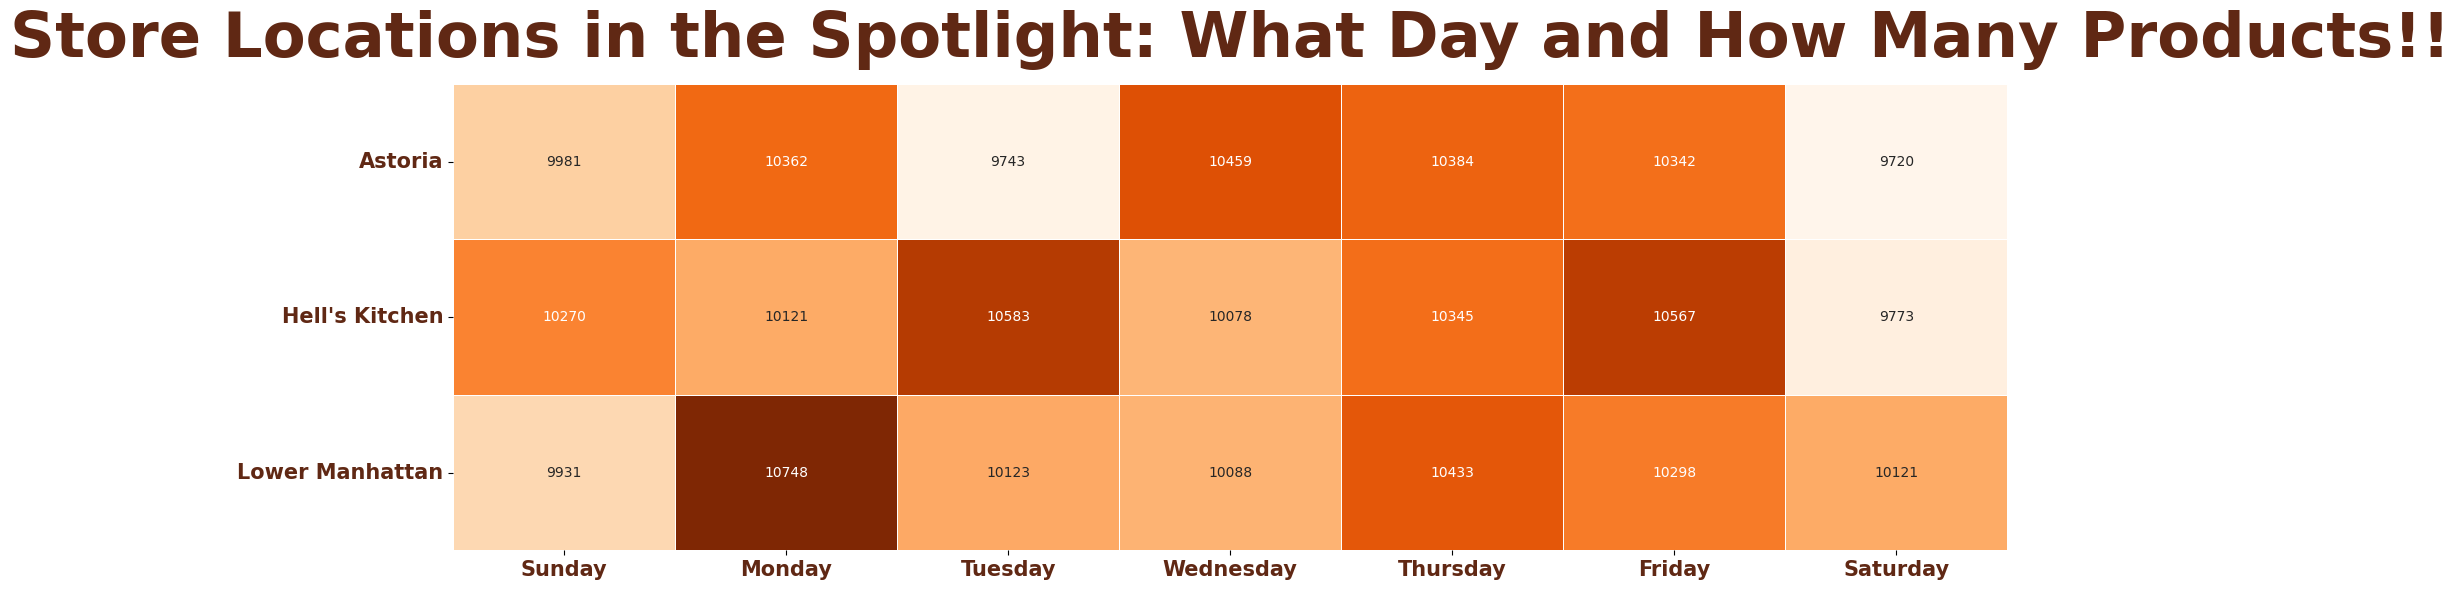

In [21]:
heatmap_data5 = df.pivot_table(index="store_location",columns="Day Name",values="transaction_qty",aggfunc="count",fill_value=0)
plt.figure(figsize=(18, 6))
sns.heatmap(heatmap_data5,annot=True,fmt="d",cmap="Oranges",linewidths=0.5,cbar=False)
plt.xticks(fontsize=15, fontweight='bold', rotation=0, color=barcolor[1])
plt.yticks(fontsize=15, fontweight='bold', rotation=0, color=barcolor[1])
plt.title("Store Locations in the Spotlight: What Day and How Many Orders!!", fontsize=45, fontweight='bold', color="#602814", y=1.04)
plt.xlabel("")
plt.ylabel("")
plt.tight_layout()
plt.show()
heatmap_data5 = df.pivot_table(index="store_location",columns="Day Name",values="transaction_qty",aggfunc="sum",fill_value=0)
plt.figure(figsize=(18, 6))
sns.heatmap(heatmap_data5,annot=True,fmt="d",cmap="Oranges",linewidths=0.5,cbar=False)
plt.xticks(fontsize=15, fontweight='bold', rotation=0, color=barcolor[1])
plt.yticks(fontsize=15, fontweight='bold', rotation=0, color=barcolor[1])
plt.title("Store Locations in the Spotlight: What Day and How Many Products!!", fontsize=45, fontweight='bold', color="#602814", y=1.04)
plt.xlabel("")
plt.ylabel("")
plt.tight_layout()
plt.show()

<h1 style="font-size:20px; font-family:Times New Roman; font-weight:bold; background-color:white; color:#602814; text-align:left; border-radius:1px 1px;">
"A Coffee Intermission: Let’s Absorb the Data"
</h1>

- **When it comes to a busy day at work, it’s usually Astoria. But when it comes to sales volume, Lower Manhattan takes the lead.**

- **Saturdays are not as busy as the other weekdays.**

- **There’s a consistent pattern of lower order counts (not sales volume) across most locations, except in Lower Manhattan, which focuses more on high sales volume than order quantity.**

- **Mondays, Thursdays, and Fridays can be considered hustling days, with both high order counts and strong sales volume. (We can guess why—Monday kicks off the workweek and Friday wraps it up.)**

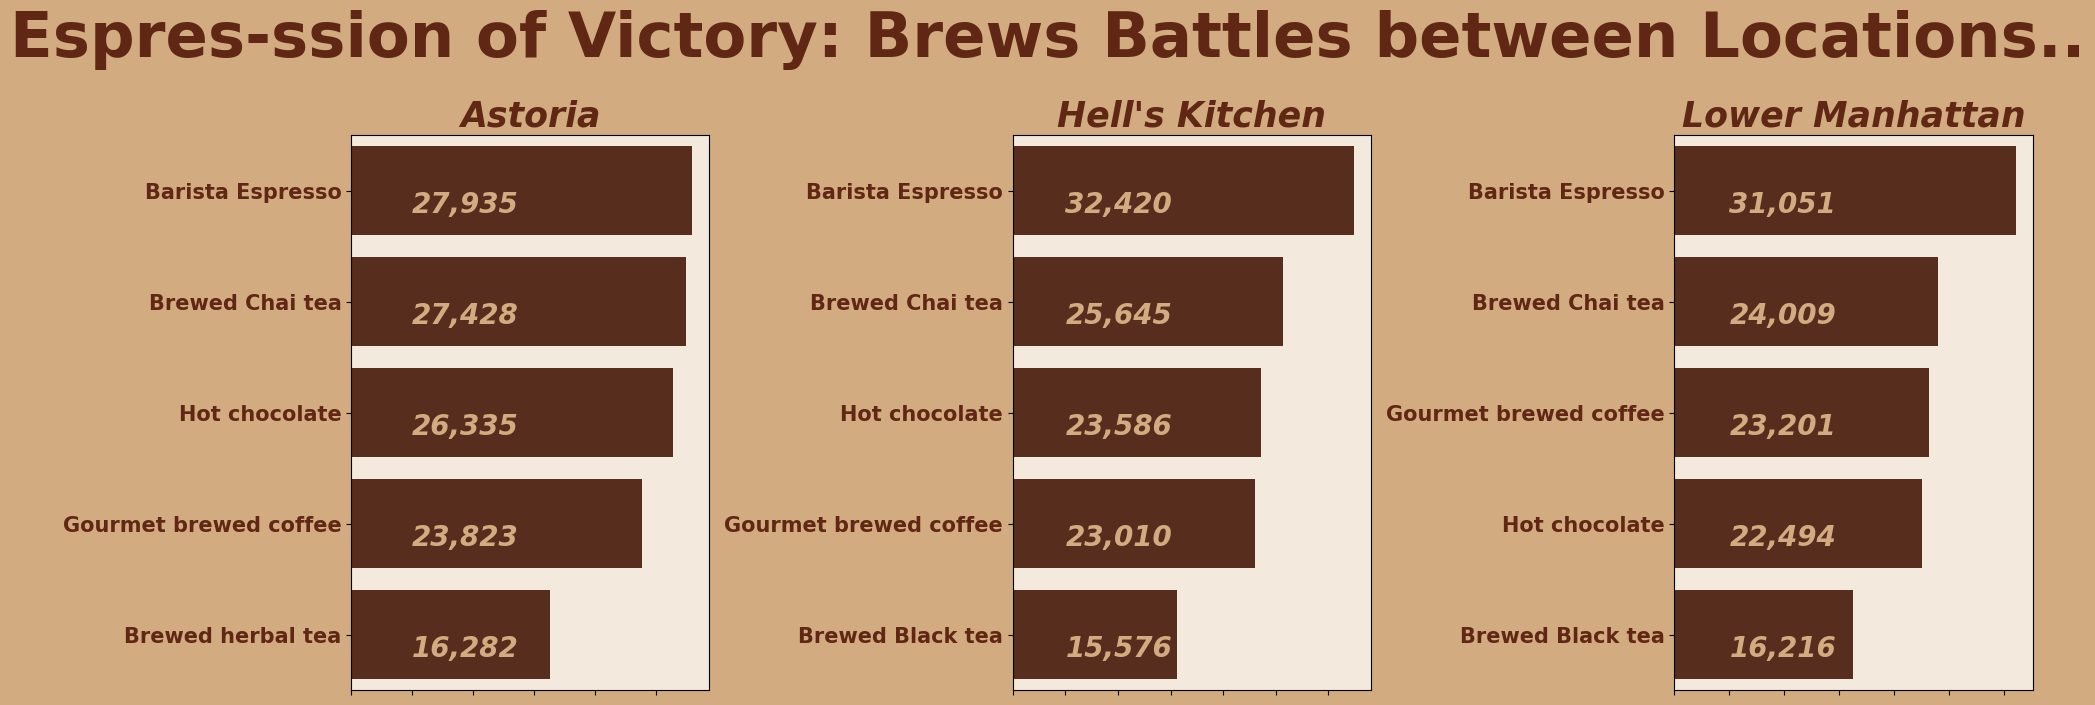

In [22]:
top5 = (
    df.groupby(["store_location", "product_type"])["Total_Bill"]
    .sum()
    .reset_index()
    .sort_values(["store_location", "Total_Bill"], ascending=[True, False])
    .groupby("store_location")
    .head(5)
)

location1 = top5[top5["store_location"] == "Astoria"]
location2 = top5[top5["store_location"] == "Hell's Kitchen"]
location3 = top5[top5["store_location"] == "Lower Manhattan"]

def plot_category_revenue(ax, data, title):
    sns.barplot(data=data, x="Total_Bill", y="product_type", color=barcolor[1], ax=ax, errorbar=None)
    bill_values = data["Total_Bill"].tolist()[::-1] 
    y_positions = [4.2, 3.2, 2.2, 1.2, 0.2]
    for val, y in zip(bill_values, y_positions):
        ax.text(5000, y, f"{val:,.0f}", fontsize=20, color="#d2ab80",fontweight="bold",style="italic")
    ax.set_xlabel("")
    ax.set_ylabel("")
    ax.set_title(title, fontsize=25, fontweight='bold', color=barcolor[1], style="italic")
    ax.set_xticklabels([])
    ax.set_yticklabels(ax.get_yticklabels(), fontsize=15, color=barcolor[1], weight='bold')
    ax.set_facecolor("#f3e9dc")
fig, axs = plt.subplots(1, 3, figsize=(20, 7))
fig.patch.set_facecolor("#d2ab80")
fig.suptitle("Espres-ssion of Victory: Brews Battles between Locations..", fontsize=45, fontweight='bold', color="#602814", y=1)
plot_category_revenue(axs[0], location1, title="Astoria")
plot_category_revenue(axs[1], location2, title="Hell's Kitchen")
plot_category_revenue(axs[2], location3, title="Lower Manhattan")
plt.tight_layout()
plt.show()

<h1 style="font-size:20px; font-family:Times New Roman; font-weight:bold; background-color:white; color:#602814; text-align:left; border-radius:1px 1px;">
"A Coffee Intermission: Let’s Absorb the Data"
</h1>

**Barista Espresso leads across all locations, showing a strong caffeine preference. Astoria favors Hot Chocolate and Chai Tea, while Hell’s Kitchen is espresso-heavy. Lower Manhattan shows balanced choices. Brewed herbal and black teas trail in popularity everywhere.**

<h1 style="font-size:30px; font-family:'Times New Roman', serif; font-weight:bold; background-color:#e0d2b7; color:#602814; text-align:left; border-radius:4px; padding:10px;">
  “Espresso Yourself: Hour by Hour, Bean There Done That!”<br>
  <span style="font-size:20px; font-weight:normal;">
    Because analyzing coffee sales one hour at a time is peak productivity.
  </span>
</h1>



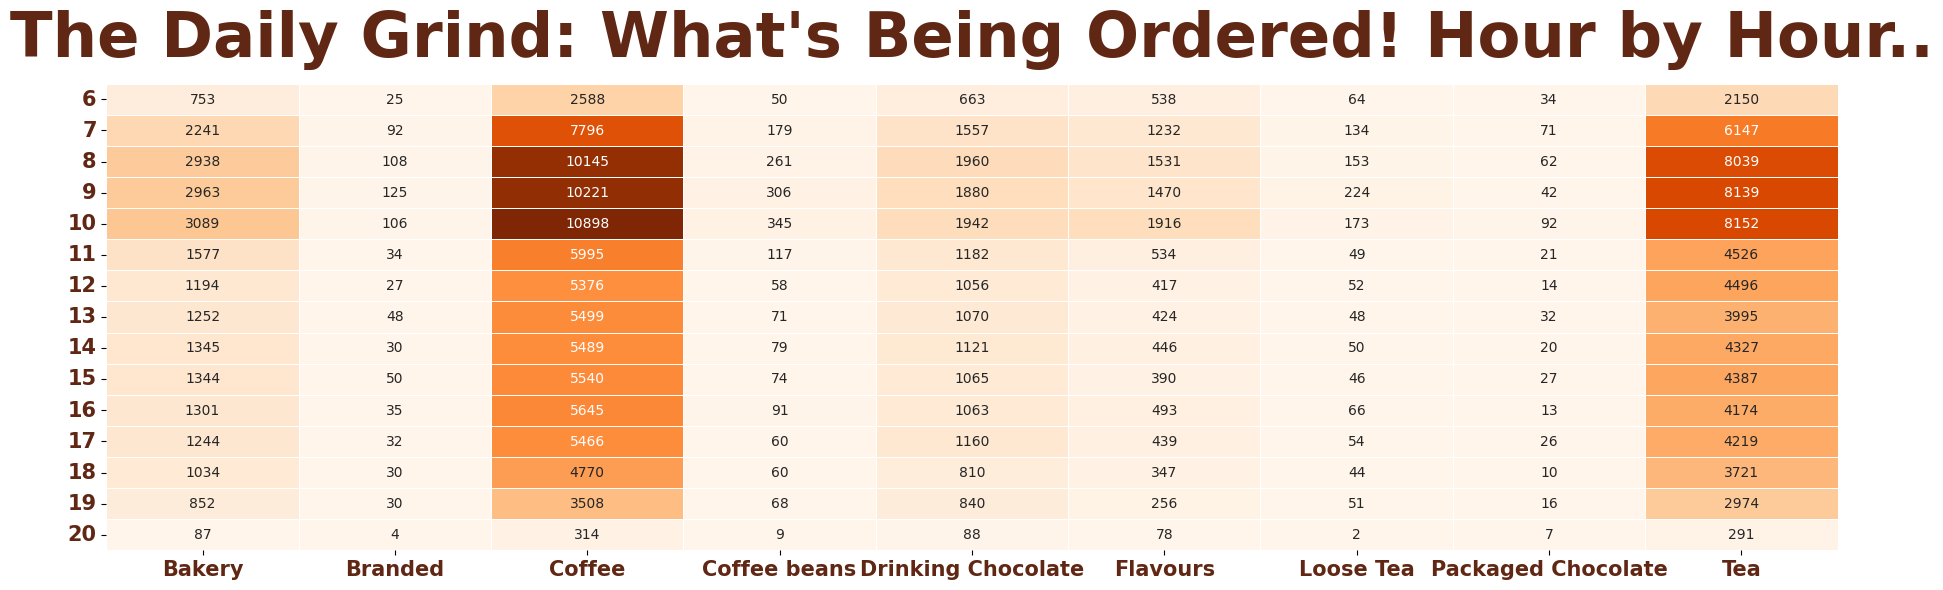

In [23]:
heatmap_data2 = df.pivot_table(index="Hour",columns="product_category",values="transaction_qty", aggfunc="sum",fill_value=0)
plt.figure(figsize=(18, 6))
sns.heatmap(heatmap_data2,annot=True,fmt="d",cmap="Oranges",linewidths=0.5,cbar=False)
plt.xticks(fontsize=15, fontweight='bold', rotation=0,color=barcolor[1])
plt.yticks(fontsize=15, fontweight='bold', rotation=0,color=barcolor[1])
plt.title("The Daily Grind: What's Being Ordered! Hour by Hour..", fontsize=45, fontweight='bold', color="#602814", y=1.04)
plt.xlabel("")
plt.ylabel("")
plt.tight_layout()
plt.show()


<h1 style="font-size:20px; font-family:Times New Roman; font-weight:bold; background-color:white; color:#602814; text-align:left; border-radius:1px 1px;">
"A Coffee Intermission: Let’s Absorb the Data"
</h1>

- **After 7 a.m., all categories see a strong surge in sales volume, nearly tripling once the stores open.**

- **Coffee and tea remain the top-selling items, but bakery sales also rise noticeably, though not necessarily due to the beverages.**

- **As the day progresses, overall orders drop, with coffee and tea showing the sharpest decline after 5 p.m.**

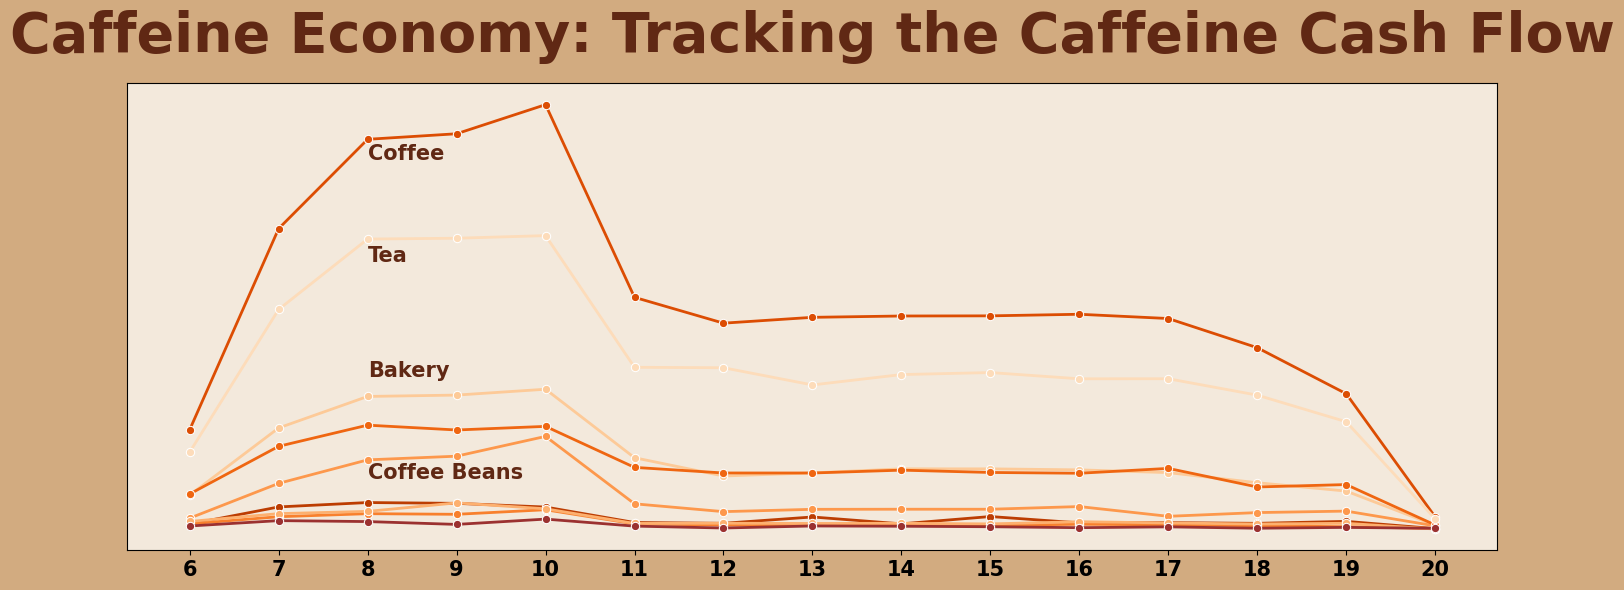

In [24]:
hourly = df.groupby(['Hour', 'product_category'])['Total_Bill'].sum().reset_index()
hourly = hourly.sort_values(by='Hour')
fig, ax = plt.subplots(figsize=(14, 6))
oranges = ["#fdca98","#bc3d02","#dc4d03","#fd984c","#ef6611","#f8802d","#fdb06f","#9b3130","#fddcba",]
sns.lineplot(data=hourly, x='Hour', y='Total_Bill', hue='product_category', marker='o', linewidth=2, ax=ax,palette=oranges)
ax.set_title("Caffeine Economy: Tracking the Caffeine Cash Flow", fontsize=40, fontweight='bold', color=barcolor[1],y=1.05)
ax.set_xlabel("Hour of Day", fontsize=12)
ax.set_ylabel("Total Bill", fontsize=12)
ax.text(8,29000,"Coffee",fontsize=15,color=barcolor[1],fontweight="bold")
ax.text(8,21000,"Tea",fontsize=15,color=barcolor[1],fontweight="bold")
ax.text(8,12000,"Bakery",fontsize=15,color=barcolor[1],fontweight="bold")
ax.text(8,4000,"Coffee Beans",fontsize=15,color=barcolor[1],fontweight="bold")
ax.set_xticks(range(6, 21)) 
ax.grid(False)
ax.set_facecolor("#f3e9dc")
fig.patch.set_facecolor("#d2ab80")
ax.legend(title='Product Type')
ax.set_yticks([])
ax.set_yticklabels([])
ax.set_ylabel("")
ax.set_xlabel("")
ax.legend().set_visible(False)
ax.tick_params(axis='x', labelsize=15)
ax.set_xticklabels(ax.get_xticks(), fontsize=15, weight='bold')
plt.tight_layout()
plt.show()

<h1 style="font-size:20px; font-family:Times New Roman; font-weight:bold; background-color:white; color:#602814; text-align:left; border-radius:1px 1px;">
"A Coffee Intermission: Let’s Absorb the Data"
</h1>

- **Peak demand for coffee and tea is between 8 a.m. to 10 a.m., indicating a strong morning caffeine routine.**

- **Sharp drop after 11 a.m. for coffee and tea shows a clear fall-off in hot beverage demand post-morning.**

- **Bakery items mirror beverage trends, peaking mid-morning and declining post-lunch, showing their tie to breakfast/snack hours.**

- **Sales stabilize after 12 p.m., but coffee remains the most purchased category until closing.**

- **Post-5 p.m. decline is evident across all categories, indicating reduced footfall or a caffeine cutoff habit.**

- **Coffee Beans remain niche, showing low but consistent demand throughout the day.**

- **6 a.m. and 8 p.m. are the weakest sales hours, emphasizing late openers and early closers see least action.**


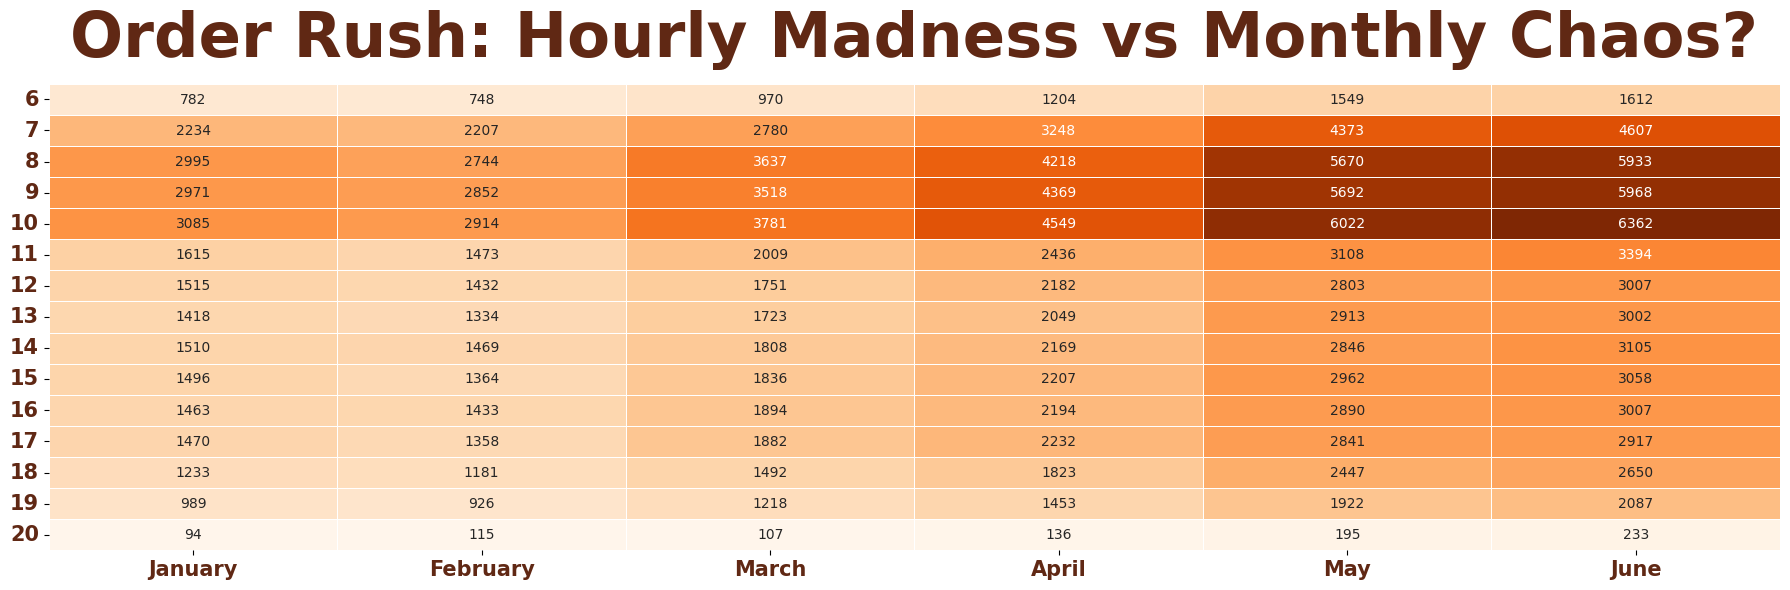

In [25]:
heatmap_data3 = df.pivot_table(index="Hour",columns="Month Name",values="transaction_qty",aggfunc="sum",fill_value=0)
plt.figure(figsize=(18, 6))
sns.heatmap(heatmap_data3,annot=True,fmt="d",cmap="Oranges",linewidths=0.5,cbar=False)
plt.xticks(fontsize=15, fontweight='bold', rotation=0, color=barcolor[1])
plt.yticks(fontsize=15, fontweight='bold', rotation=0, color=barcolor[1])
plt.title("Order Rush: Hourly Madness vs Monthly Chaos?", fontsize=45, fontweight='bold', color="#602814", y=1.04)
plt.xlabel("")
plt.ylabel("")
plt.tight_layout()
plt.show()

<h1 style="font-size:20px; font-family:Times New Roman; font-weight:bold; background-color:white; color:#602814; text-align:left; border-radius:1px 1px;">
"A Coffee Intermission: Let’s Absorb the Data"
</h1>

- **Rush hours remain consistent across all months, but after rush hours, sales volume fluctuates by around 100 products per hour in January and February.**

- **Sales volume doubles during each hour in May and June compared to earlier months.**

- **It is evident that as the months progress, overall sales volume steadily increases.**

<h1 style="font-size:30px; font-family:'Times New Roman', serif; font-weight:bold; background-color:#e0d2b7; color:#602814; text-align:left; border-radius:4px; padding:10px;">
  “Half a Year of Sips: The Coffee Chronicles of Our 6-Month Journey”<br>
  <span style="font-size:20px; font-weight:normal;">
    6 months, countless cups, one caffeine dependency.
  </span>
</h1>

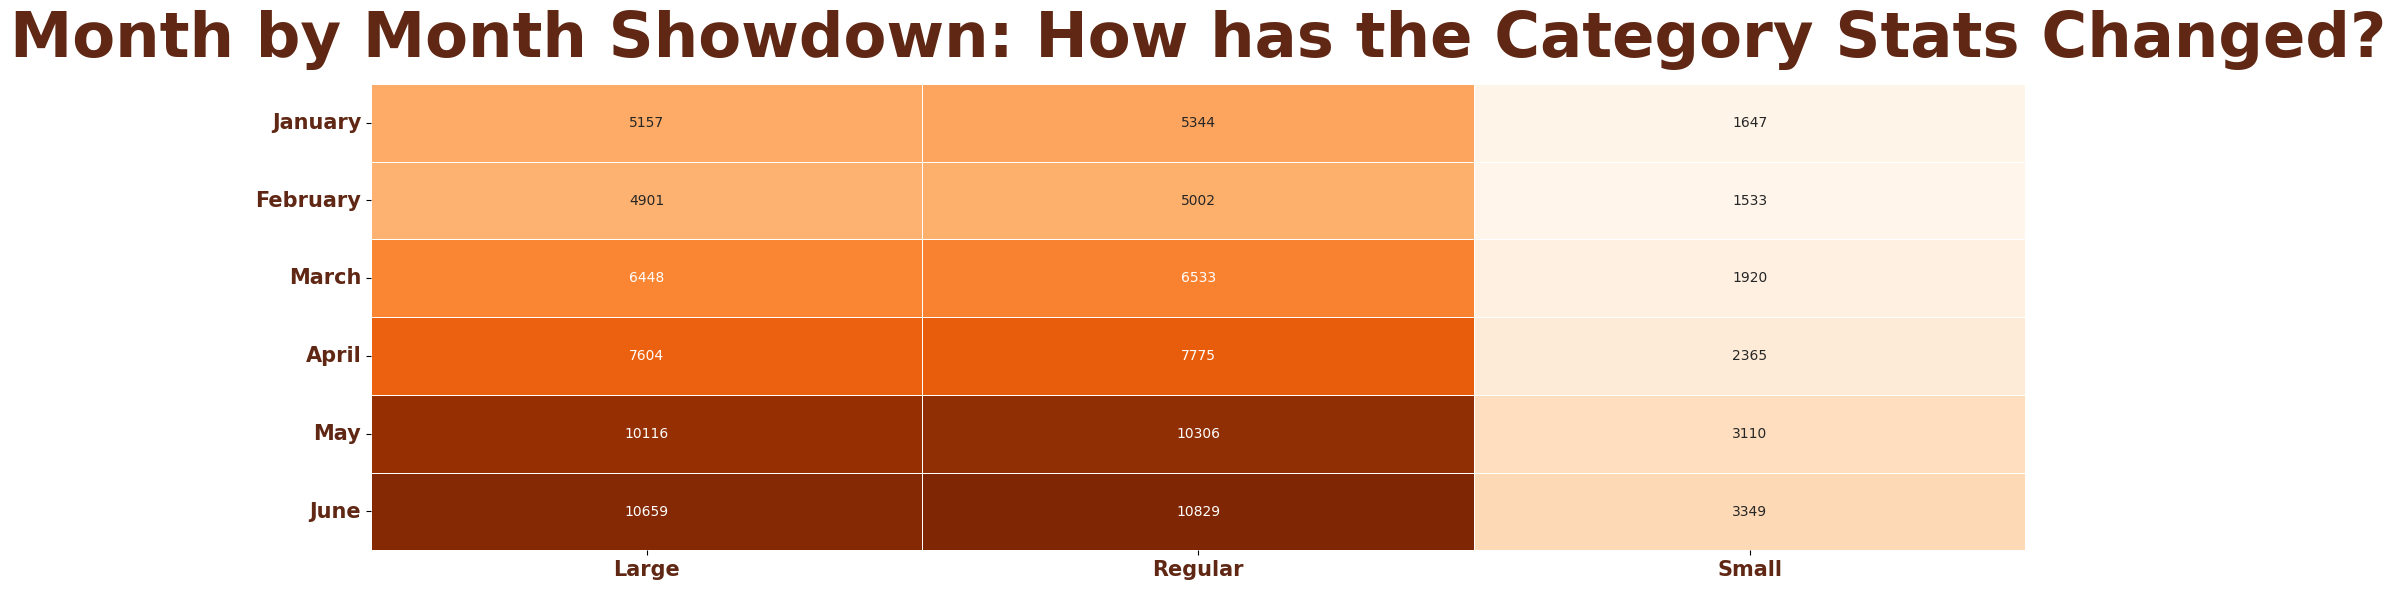

In [26]:
df1 = df[df["Size"] !="Not Defined"]
heatmap_data4 = df1.pivot_table(index="Month Name",columns="Size",values="transaction_qty",  aggfunc="count",fill_value=0)
plt.figure(figsize=(18, 6))
sns.heatmap(heatmap_data4,annot=True,fmt="d",cmap="Oranges",linewidths=0.5,cbar=False)
plt.xticks(fontsize=15, fontweight='bold', rotation=0, color=barcolor[1])
plt.yticks(fontsize=15, fontweight='bold', rotation=0, color=barcolor[1])
plt.title("Month by Month Showdown: How has the Category Stats Changed?", fontsize=45, fontweight='bold', color="#602814", y=1.04)
plt.xlabel("")
plt.ylabel("")
plt.tight_layout()
plt.show()

<h1 style="font-size:20px; font-family:Times New Roman; font-weight:bold; background-color:white; color:#602814; text-align:left; border-radius:1px 1px;">
"A Coffee Intermission: Let’s Absorb the Data"
</h1>

- **A double trend is observed across all beverage sizes, with varying preferences among different people each month.**

- **Large and Regular drink customers significantly outnumber those preferring small beverages.**

- **Large and Regular consumers are three times more than those who opt for small drinksIt could be that three small coffees equal one large coffee, or three regular coffees equal one large coffee.**

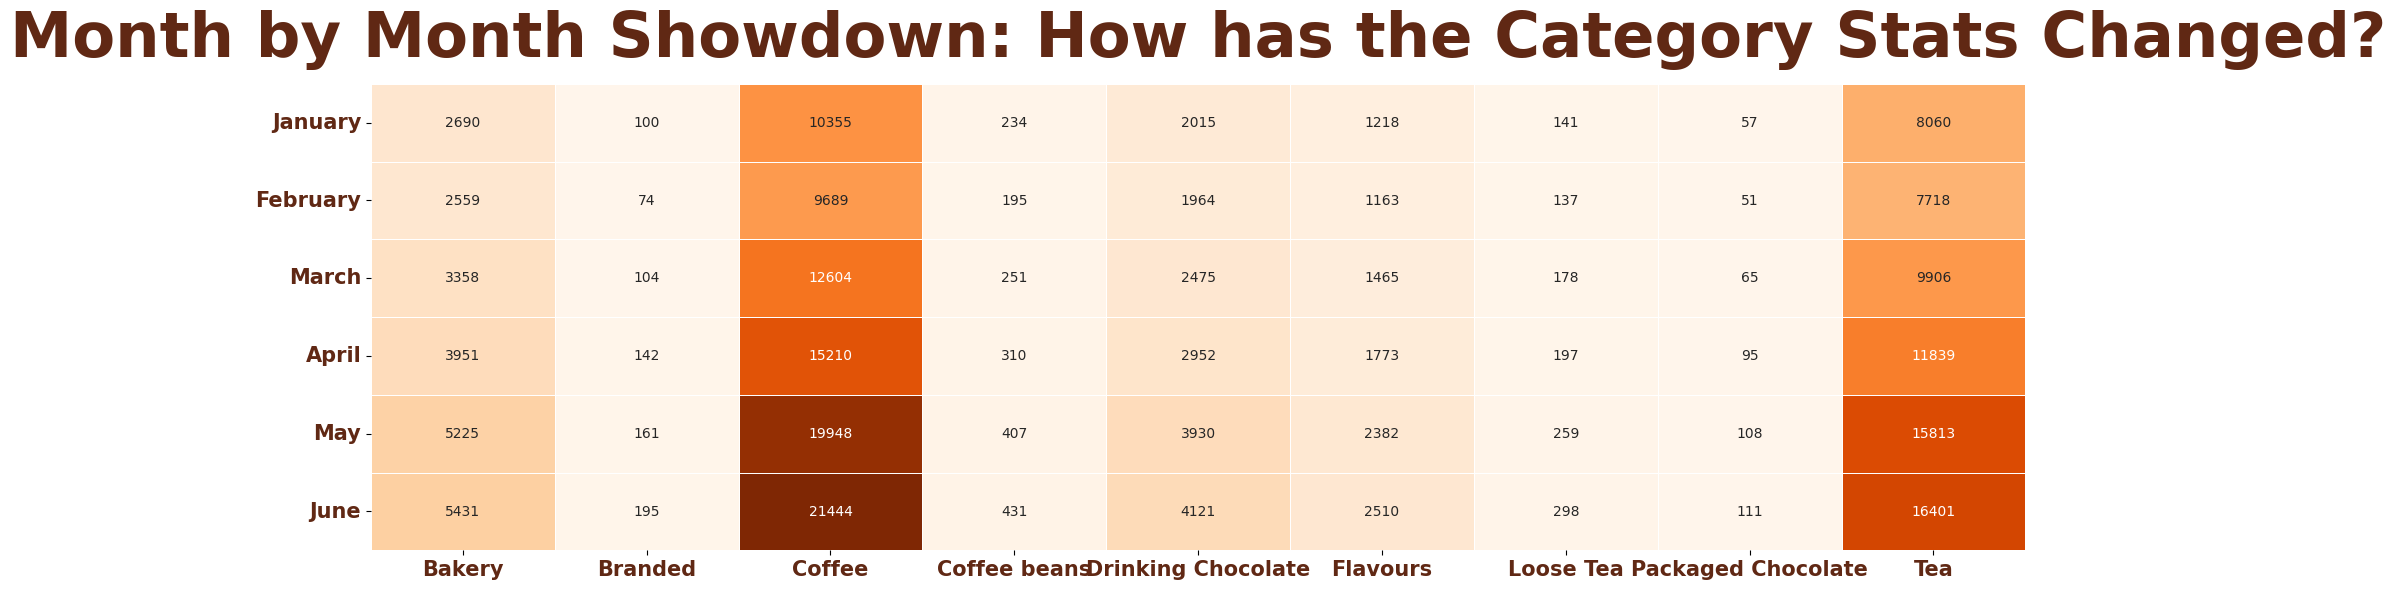

In [27]:
month_order = ["January", "February", "March", "April", "May", "June"]
df["Month Name"] = pd.Categorical(df["Month Name"], categories=month_order, ordered=True)
heatmap_data4 = df.pivot_table(index="Month Name",columns="product_category",values="transaction_qty",  aggfunc="sum",fill_value=0)
plt.figure(figsize=(18, 6))
sns.heatmap(heatmap_data4,annot=True,fmt="d",cmap="Oranges",linewidths=0.5,cbar=False)
plt.xticks(fontsize=15, fontweight='bold', rotation=0, color=barcolor[1])
plt.yticks(fontsize=15, fontweight='bold', rotation=0, color=barcolor[1])
plt.title("Month by Month Showdown: How has the Category Stats Changed?", fontsize=45, fontweight='bold', color="#602814", y=1.04)
plt.xlabel("")
plt.ylabel("")
plt.tight_layout()
plt.show()

<h1 style="font-size:20px; font-family:Times New Roman; font-weight:bold; background-color:white; color:#602814; text-align:left; border-radius:1px 1px;">
"A Coffee Intermission: Let’s Absorb the Data"
</h1>

- **Once again, a double trend, or even better, more than double the sales volume, can be seen in every single category like everyone’s double-tapping on their favorite drinks!**

- **Coffee and Tea reached double the sales in 6 months, meaning Caffeine: the new H2O?**

- **There’s a significant decrease in every category in the month of February. Maybe February needs a New Year of its own to boost the sales numbers.**

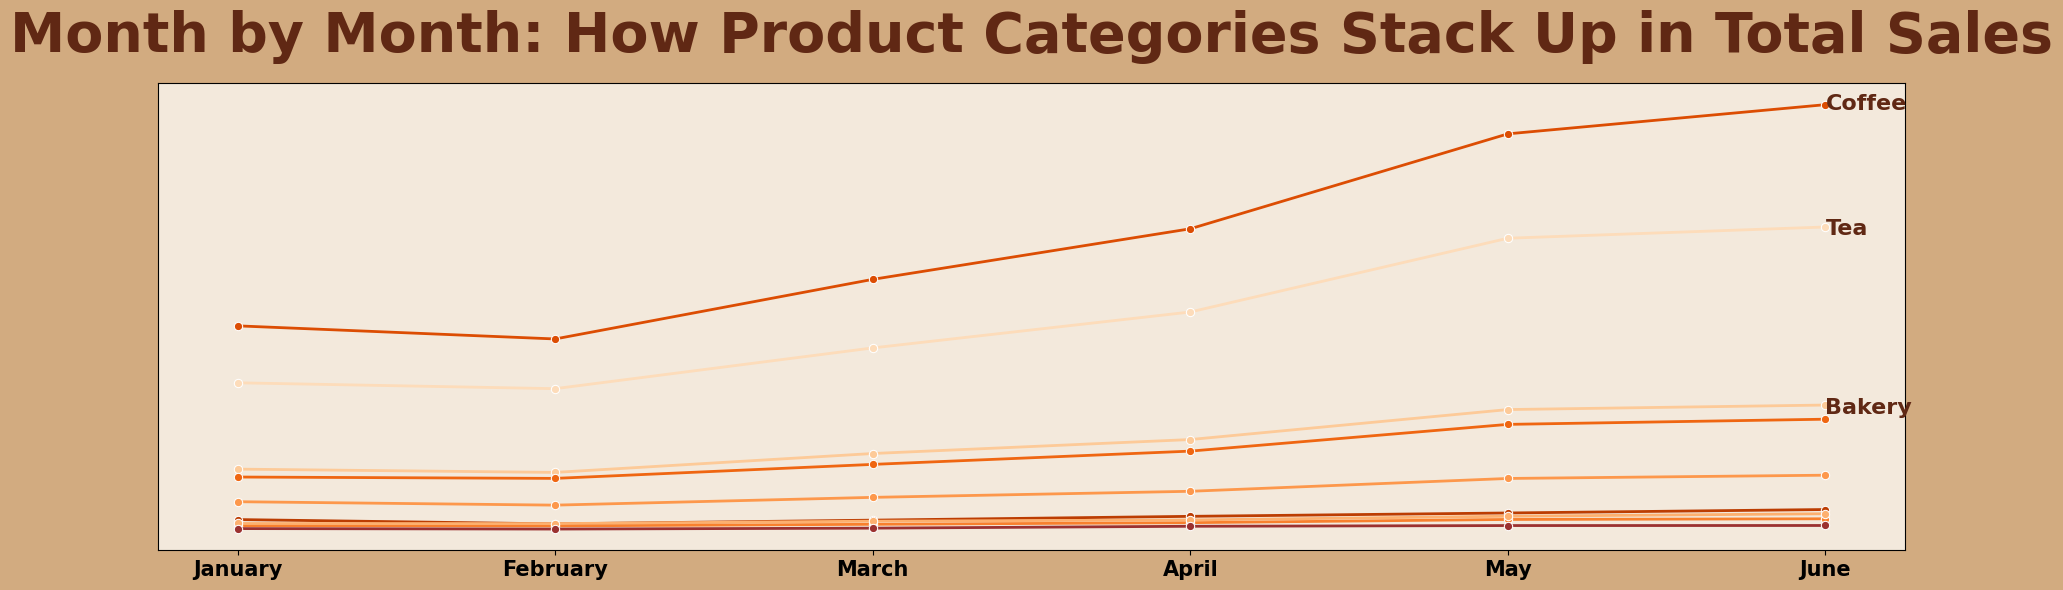

In [28]:
hourly = df.groupby(['Month Name', 'product_category'])['Total_Bill'].sum().reset_index()
hourly = hourly.sort_values(by='Month Name')
fig, ax = plt.subplots(figsize=(18, 6))
oranges = ["#fdca98","#bc3d02","#dc4d03","#fd984c","#ef6611","#f8802d","#fdb06f","#9b3130","#fddcba",]
sns.lineplot(data=hourly, x='Month Name', y='Total_Bill', hue='product_category', marker='o', linewidth=2, ax=ax,palette=oranges)
ax.set_title("Month by Month: How Product Categories Stack Up in Total Sales", fontsize=40, fontweight='bold', color=barcolor[1],y=1.05)
ax.set_xlabel("Hour of Day", fontsize=12)
ax.set_ylabel("Total Bill", fontsize=12)
ax.text(5,64000,"Coffee",fontsize=16,color=barcolor[1],fontweight="bold")
ax.text(5,45000,"Tea",fontsize=16,color=barcolor[1],fontweight="bold")
ax.text(5,18000,"Bakery",fontsize=16,color=barcolor[1],fontweight="bold")
ax.set_xticklabels(['January', 'February', 'March', 'April', 'May',"June"], fontsize=15, weight='bold')
ax.grid(False)
ax.set_facecolor("#f3e9dc")
fig.patch.set_facecolor("#d2ab80")
ax.legend(title='Product Type')
ax.set_yticks([])
ax.set_yticklabels([])
ax.set_ylabel("")
ax.legend().set_visible(False)
ax.set_xlabel("")
plt.tight_layout()
plt.show()

<h1 style="font-size:30px; font-family:'Times New Roman', serif; font-weight:bold; background-color:#e0d2b7; color:#602814; text-align:left; border-radius:4px; padding:10px;">
  “45 Products, 24 Hours: One Big, Beautiful Mess of Coffee Madness”<br>
  <span style="font-size:20px; font-weight:normal;">
    Because nothing says ‘data analysis’ like trying to track 45 coffee types every hour.
  </span>
</h1>

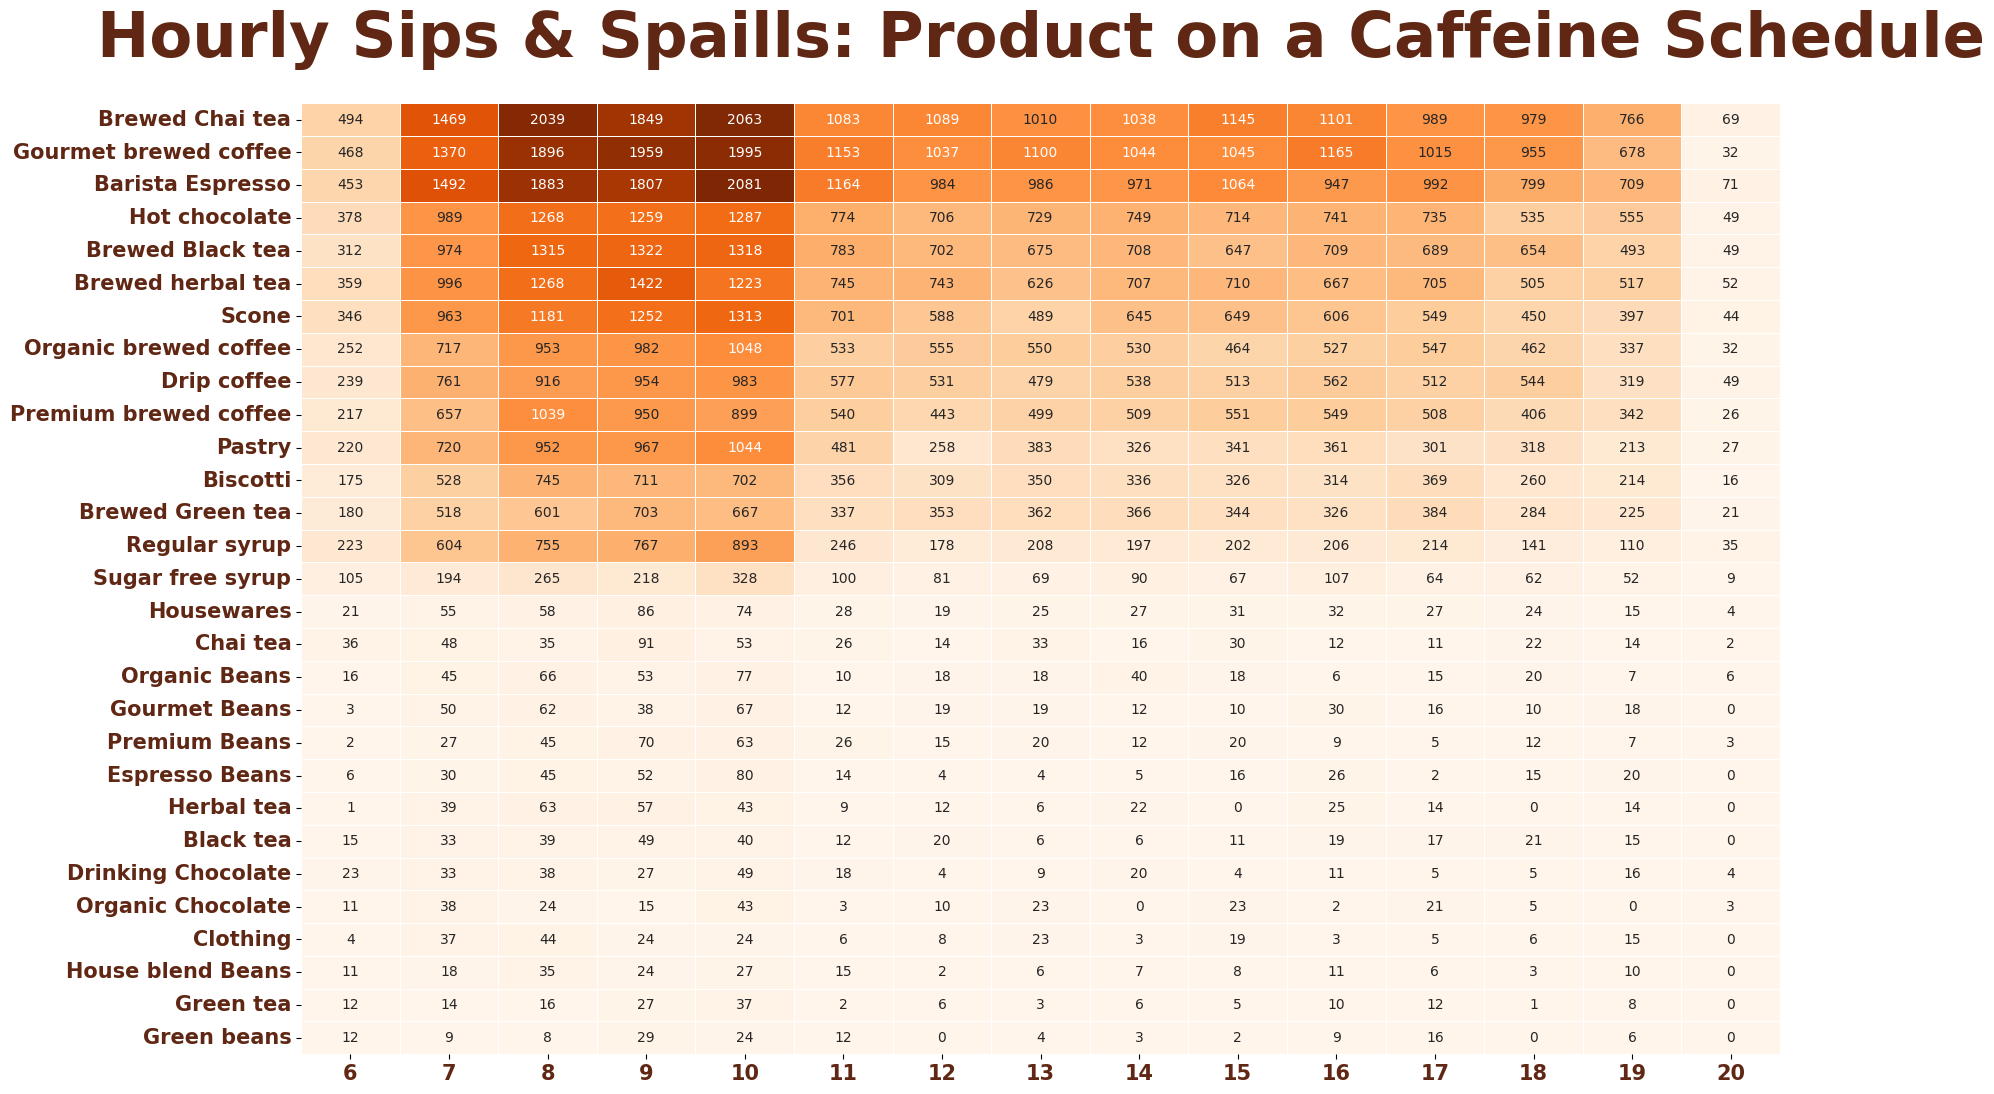

In [29]:
heatmap_data5 = df.pivot_table(index="product_type", columns="Hour", values="transaction_qty", aggfunc="count", fill_value=0)
heatmap_data5 = heatmap_data5.loc[heatmap_data5.sum(axis=1).sort_values(ascending=False).index, :]
plt.figure(figsize=(18, 11))
sns.heatmap(heatmap_data5, annot=True, fmt="d", cmap="Oranges", linewidths=0.5, cbar=False)
plt.xticks(fontsize=15, fontweight='bold', rotation=0, color=barcolor[1])
plt.yticks(fontsize=15, fontweight='bold', rotation=0, color=barcolor[1])
plt.title("Hourly Sips & Spaills: Product on a Caffeine Schedule", fontsize=45, fontweight='bold', color="#602814", y=1.04)
plt.xlabel("")
plt.ylabel("")
plt.tight_layout()
plt.show()


<h1 style="font-size:20px; font-family:Times New Roman; font-weight:bold; background-color:white; color:#602814; text-align:left; border-radius:1px 1px;">
"A Coffee Intermission: Let’s Absorb the Data"
</h1>

- **Top choices according to hourly demands (in numbers):**

        a) Barsta Espresso: 7000
        b) Brewed Chai Tea: 7200
        c) Brewed Herbal Tea: 4600
        d) Gourmet Brewed Coffee: 7000
- **During rush hours, Bakery sales are higher, right? Now, check the rush hour numbers for Pastry, Scones, and Biscotti.**

- **Hot Chocolate makes it to the top 10 products. Between 7 am and 10 am, it's a delightful start to the day.**

- **Tea: When it's herbal or black, it gets unnoticed. But when brewed, it rises among the top 5 tea products.**

- **Beans—whether organic, green, gourmet, or espresso—don't seem to be many people's favorite.**

- **Hot Chocolate sales remain high, unlike drinking chocolate, which doesn't seem to make the same impact.**

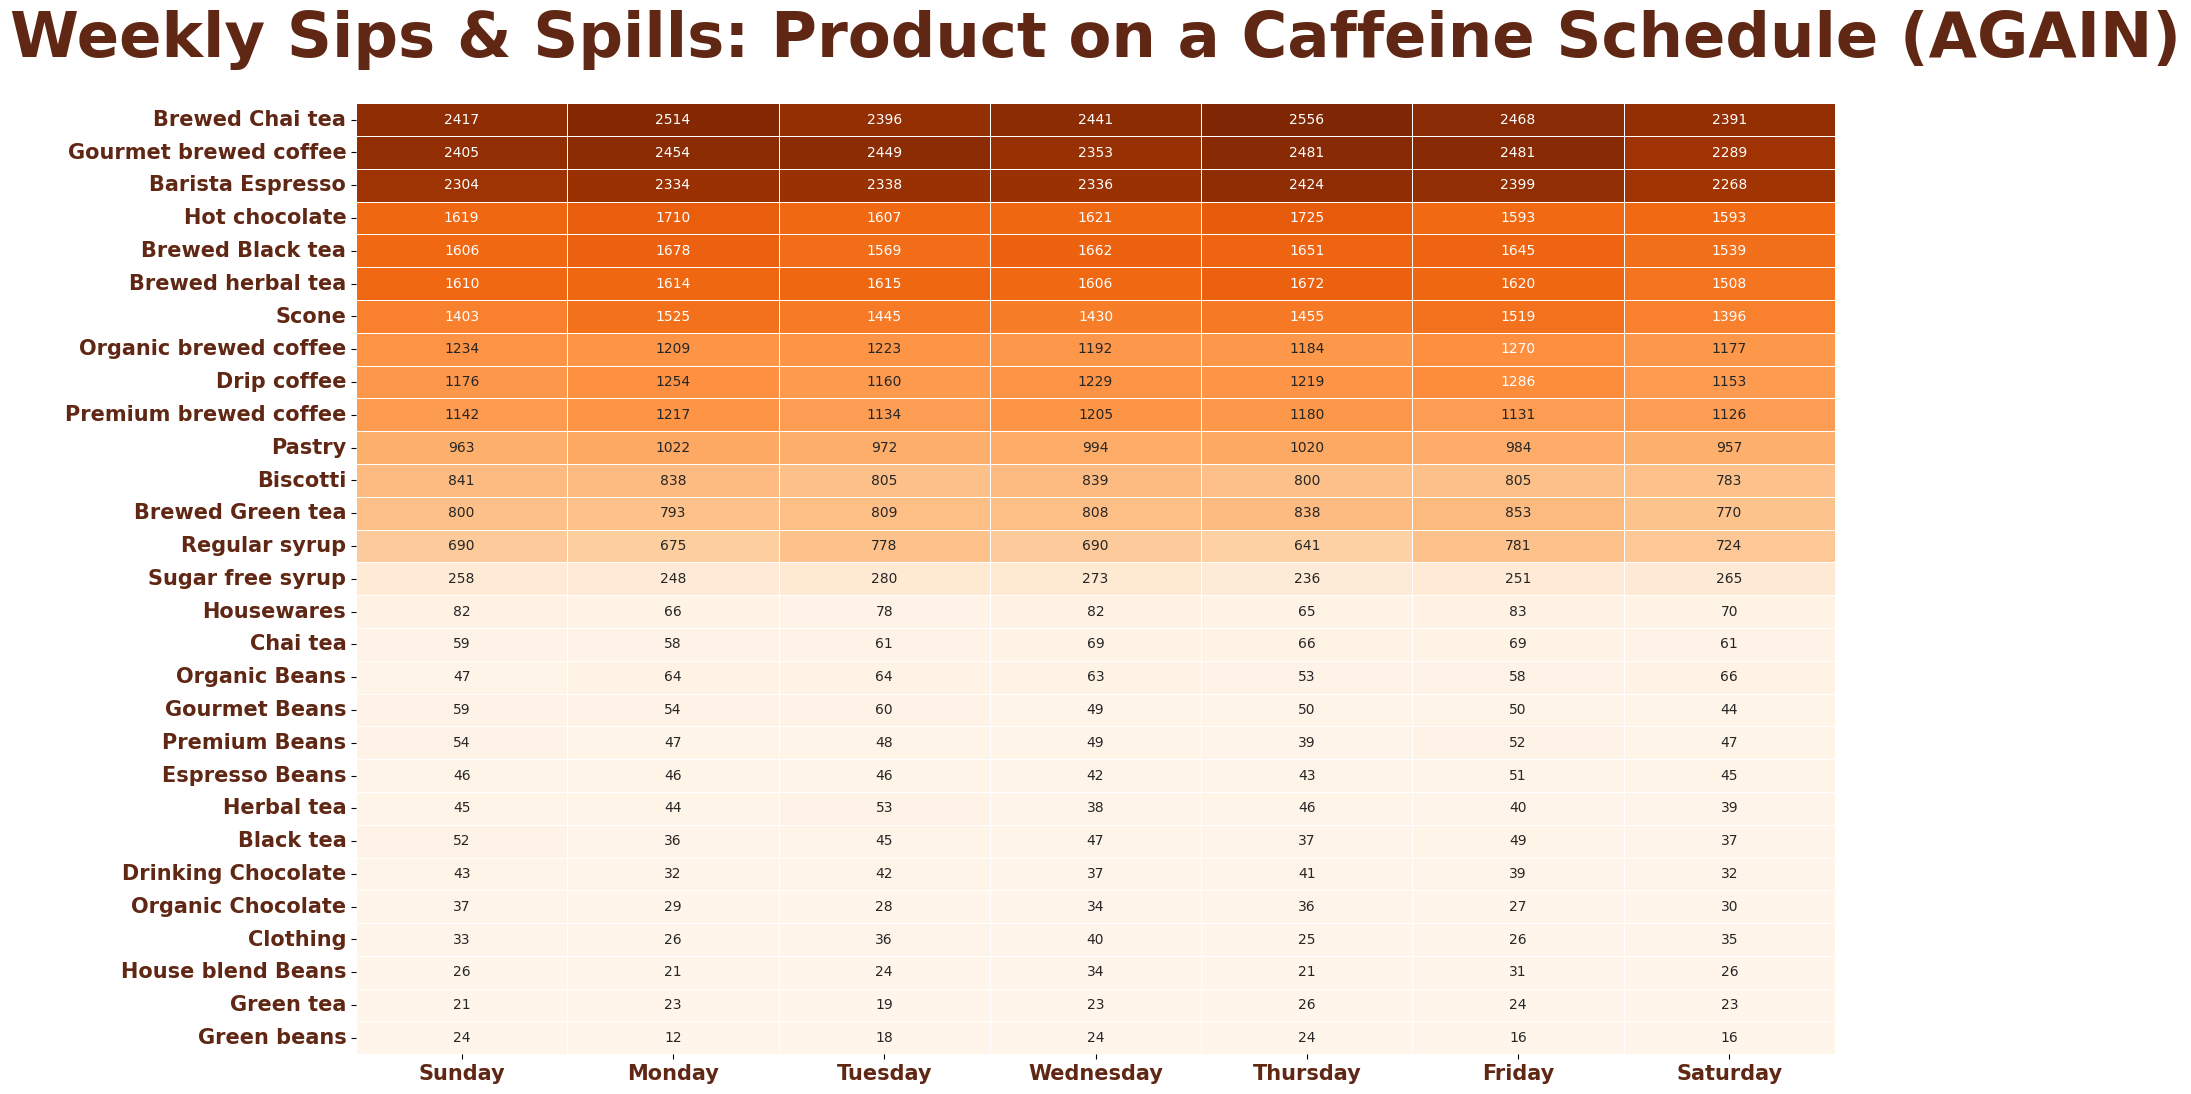

In [30]:
heatmap_data5 = df.pivot_table(index="product_type", columns="Day Name", values="transaction_qty", aggfunc="count", fill_value=0)
heatmap_data5 = heatmap_data5.loc[heatmap_data5.sum(axis=1).sort_values(ascending=False).index, :]
plt.figure(figsize=(18, 11))
sns.heatmap(heatmap_data5, annot=True, fmt="d", cmap="Oranges", linewidths=0.5, cbar=False)
plt.xticks(fontsize=15, fontweight='bold', rotation=0, color=barcolor[1])
plt.yticks(fontsize=15, fontweight='bold', rotation=0, color=barcolor[1])
plt.title("Weekly Sips & Spills: Product on a Caffeine Schedule (AGAIN)", fontsize=45, fontweight='bold', color="#602814", y=1.04)
plt.xlabel("")
plt.ylabel("")
plt.tight_layout()
plt.show()


<h1 style="font-size:20px; font-family:Times New Roman; font-weight:bold; background-color:white; color:#602814; text-align:left; border-radius:1px 1px;">
"A Coffee Intermission: Let’s Absorb the Data"
</h1>

**Aaahhh!! I wish every data analyst could ESPRESSO this level of satisfaction as Sales numbers syncing like a perfectly brewed cup! Looks like the same crowd, give or take a few, is showing up every day. It’s like sales harmony every week—pure caffeine-fueled joy!**

<h1 style="font-size:30px; font-family:'Times New Roman', serif; font-weight:bold; background-color:#e0d2b7; color:#602814; text-align:left; border-radius:4px; padding:10px;">
  “From Cheap Drips to Lux Sips: A Price Tag Showdown”<br>
  <span style="font-size:20px; font-weight:normal;">
    Because even caffeine has a class system.
  </span>
</h1>

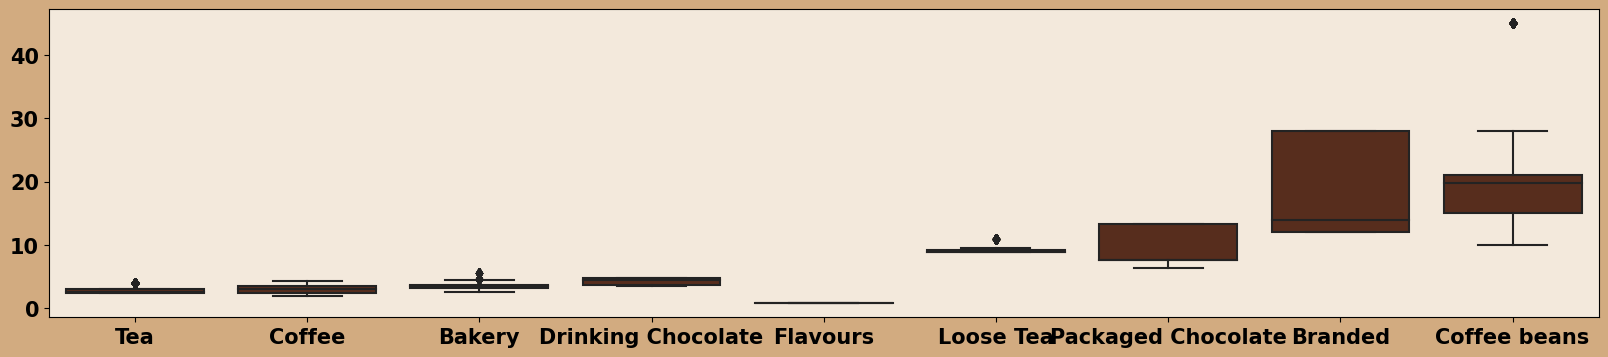

In [31]:
fig, ax = plt.subplots(figsize=(20, 4))
fig.patch.set_facecolor("#d2ab80")   
ax.set_facecolor("#f3e9dc")      
sns.boxplot(x=df["product_category"],y=df["unit_price"],ax=ax,color=barcolor[1])
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)
for label in ax.get_xticklabels():
    label.set_fontweight('bold')
for label in ax.get_yticklabels():
    label.set_fontweight('bold')
ax.set_xlabel("")
ax.set_ylabel("")

plt.show()

<h1 style="font-size:20px; font-family:Times New Roman; font-weight:bold; background-color:white; color:#602814; text-align:left; border-radius:1px 1px;">
"A Coffee Intermission: Let’s Absorb the Data"
</h1>

- **Okay so… Packed Chocolate? Bottom-tier in sales across all three kitchens, but still struttin’ in the top 3 of expensive taste. Fancy wrapper, no takers?**

- **Now enter Tea & Coffee — the budget legends. Cheapest of the lot but pulling double-triple shifts in sales. Sippin’ and sellin’ like there’s no tomorrow.**

- **But Coffee Beans? Pffft. Whether they're organic, gourmet, or massaged by monks — people just ain't biting. Costliest of all, yet barely anyone picks 'em. Guess it’s just the bean snobs with premium wallets.**

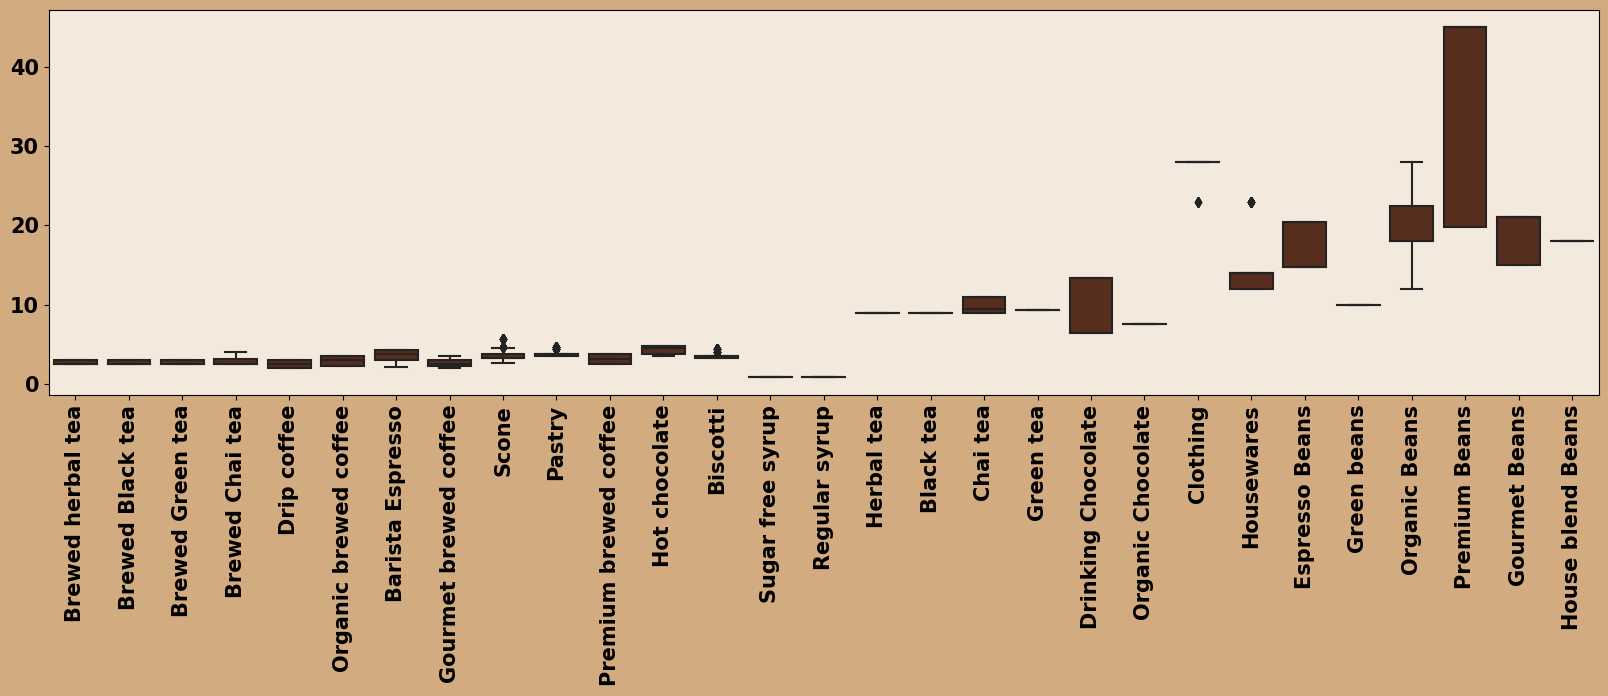

In [32]:
fig, ax = plt.subplots(figsize=(20, 5))
fig.patch.set_facecolor("#d2ab80") 
ax.set_facecolor("#f3e9dc") 
sns.boxplot(x=df["product_type"],y=df["unit_price"],ax=ax,color=barcolor[1])
plt.setp(ax.get_xticklabels(), rotation=90)
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)
for label in ax.get_xticklabels():
    label.set_fontweight('bold')
for label in ax.get_yticklabels():
    label.set_fontweight('bold')
ax.set_xlabel("")
ax.set_ylabel("")
plt.show()

<h1 style="font-size:20px; font-family:Times New Roman; font-weight:bold; background-color:white; color:#602814; text-align:left; border-radius:1px 1px;">
"A Coffee Intermission: Let’s Absorb the Data"
</h1>

- **Look Look..!! All the Beans flexin’ in the VIP lounge of price tags.**

- **Scones and Pastry? Now that’s the sweet spot, flying off shelves like they’ve got fans.**

- **Syrups? Still hustlin’ hard in the sales game. Lets blame this on Sugar rush..**

- **Drinking Chocolate slid into the top 12 sellers, high price and all — guess some folks don’t mind paying for their choco dreams!**

<h1 style="font-size:50px; font-family:Times New Roman; font-weight:bold;  font-style:italic;background-color:#e0d2b7; color:#602814; text-align:left; border-radius:1px 1px;">
The Saga Ends...
</h1>
